# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
file_path = r"File_location\Merged.xlsx"
df = pd.read_excel(file_path)
df.fillna(0, inplace=True)
df.to_excel(file_path, index=False, engine="openpyxl")
print(f"All NULL values replaced with 0 and saved in: {file_path}")

### Load Reef Health Data

In [4]:
file_path = r"Merged.xlsx"
df = pd.read_excel(file_path)

#### Display data

In [5]:
df.head()

F1        F2        F3        F4        F5        F6         F7  \
0  0.624775  0.772896  0.436627  0.706685  0.280890  0.427927  45.002766   
1  0.554239  0.542715  0.523952  0.441483  0.384931  0.332197  44.031765   
2  0.556598  0.591630  0.492991  0.479280  0.352468  0.378635  45.082909   
3  0.545005  0.570817  0.491954  0.462907  0.354878  0.366245  43.710944   
4  0.567546  0.640008  0.497460  0.522807  0.345949  0.401222  47.719499   

         F8        F9  F10  ...      F101      F102      F103      F104  \
0  0.555556  0.021386    3  ... -0.000334  0.801861  0.494397  0.654070   
1  0.583333  0.029262    3  ...  0.000461  0.000000  0.149415  0.366960   
2  0.583333  0.021843    3  ... -0.001570  0.000000  0.113314  0.344033   
3  0.583333  0.020433    3  ...  0.002680  0.000000  0.117072  0.391355   
4  0.583333  0.011850    3  ...  0.001485  0.000000  0.043994  0.277259   

       F105      F106       F107      F108      F109  Health  
0  0.815407  0.000000   0.062447  0.143993  0.139454       1  
1  0.517936  0.203667   0.081038  0.022055 -0.374816       1  
2  0.884740  0.498833   0.166389  0.502256  0.301648       1  
3  0.545555  0.227333   0.555763  0.151034  0.454889       1  
4  0.835111  0.000000 -10.531825  0.440937  0.438480       1  

[5 rows x 110 columns]

In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (5181, 110)


In [6]:
df.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
           ...   
F106      float64
F107      float64
F108      float64
F109      float64
Health      int64
Length: 110, dtype: object

#### Missing value

In [6]:
missingValue = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missingValue[missingValue > 0])


Missing Values in Each Column:
Series([], dtype: int64)


#### Summary of data

In [12]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                F1           F2           F3           F4           F5  \
count  5181.000000  5181.000000  5181.000000  5181.000000  5181.000000   
mean      0.396777     0.372812     0.508408     0.315286     0.414988   
std       0.135066     0.227587     0.045432     0.232223     0.059209   
min       0.183266     0.087196     0.303401     0.050502     0.217008   
25%       0.249337     0.198130     0.486950     0.135347     0.388288   
50%       0.450516     0.296482     0.511414     0.247443     0.429486   
75%       0.512778     0.475901     0.534992     0.394152     0.456703   
max       0.678116     0.995834     0.697574     0.994017     0.547668   

                F6           F7           F8           F9          F10  ...  \
count  5181.000000  5181.000000  5181.000000  5181.000000  5181.000000  ...   
mean      0.264234    38.468484     0.474131     0.014918     3.284501  ...   
std       0.141032    18.887985     0.186221     0.007561     1.404258  ... 

#### EDA Continued

Class distribution Healthy vs Unhealthy

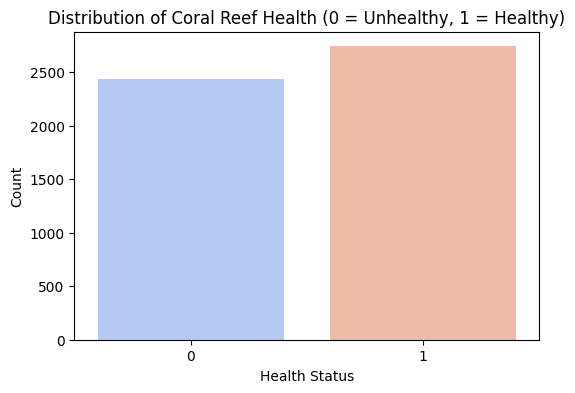

Healthy (1): 2741
Unhealthy (0): 2440


In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Health"], palette="coolwarm")
plt.title("Distribution of Coral Reef Health (0 = Unhealthy, 1 = Healthy)")
plt.xlabel("Health Status")
plt.ylabel("Count")
plt.show()

# Count of 1s (Healthy) and 0s (Unhealthy) in the Health column
num_healthy = df["Health"].value_counts().get(1, 0)
num_unhealthy = df["Health"].value_counts().get(0, 0)

# Print the results
print(f"Healthy (1): {num_healthy}")
print(f"Unhealthy (0): {num_unhealthy}")

**Correlation Heatmap**

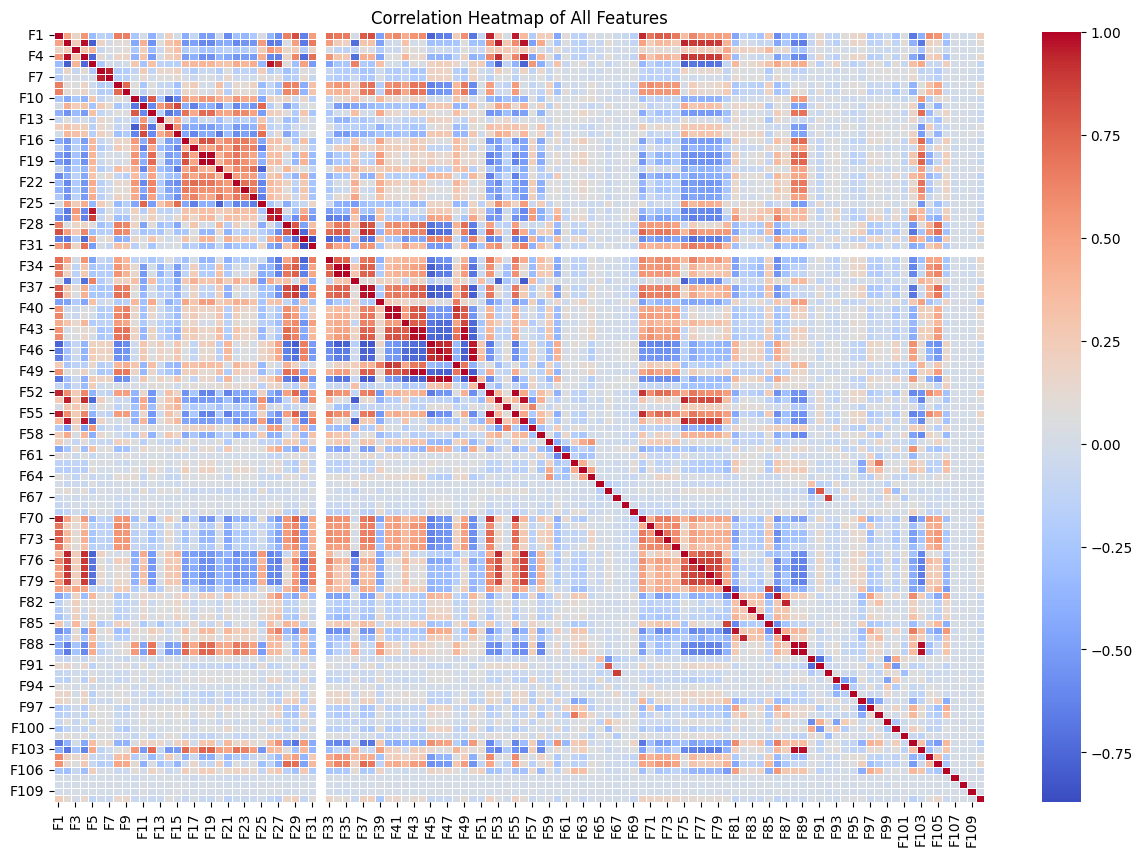

In [8]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.show()

# Prep Features for Predicting health

Remove redundant features

In [ ]:
file_path = r"File_location\Merged.xlsx"
df_full = pd.read_excel(file_path)

# Step 1: Select only feature columns (F1 to F109)
feature_columns = [col for col in df_full.columns if col.startswith("F")]
df_features = df_full[feature_columns]

#Step 2: Correlation matrix
correlation_matrix = df_features.corr()

# Step 3: Initialize set to remove features
features_to_drop = set()

# Step 4: Loop through correlation matrix to remove redundant features
for i, feature in enumerate(correlation_matrix.columns):
    if feature in features_to_drop:
        continue

    # Find features with high correlation to the current feature (excluding itself)
    correlated_features = correlation_matrix.index[
        (correlation_matrix[feature] > 0.9) & (correlation_matrix.index != feature)
    ].tolist()

    # Exclude already removed features
    correlated_features = [f for f in correlated_features if f not in features_to_drop]

    if correlated_features:
        candidate_group = [feature] + correlated_features
        # Choose the feature with the highest average correlation in the group to keep
        group_corr = correlation_matrix.loc[candidate_group, candidate_group].mean().sort_values(ascending=False)
        keep_feature = group_corr.index[0]

        # Mark all others in the group for removal
        for f in candidate_group:
            if f != keep_feature:
                features_to_drop.add(f)

#Step 5: Keep only selected features
selected_features = [f for f in df_features.columns if f not in features_to_drop]
df_filtered = df_full[selected_features + ["Health"]]  # Include Health column

#Step 6: Save the filtered dataset
output_path = r"Reef_Health_CorrelationFiltered.xlsx"
df_filtered.to_excel(output_path, index=False)

#Output summary
print(f"Original features: {len(df_features.columns)}")
print(f"Selected features: {len(selected_features)}")
print(f"Removed features: {len(features_to_drop)}")
print(f"Filtered dataset saved to: {output_path}")

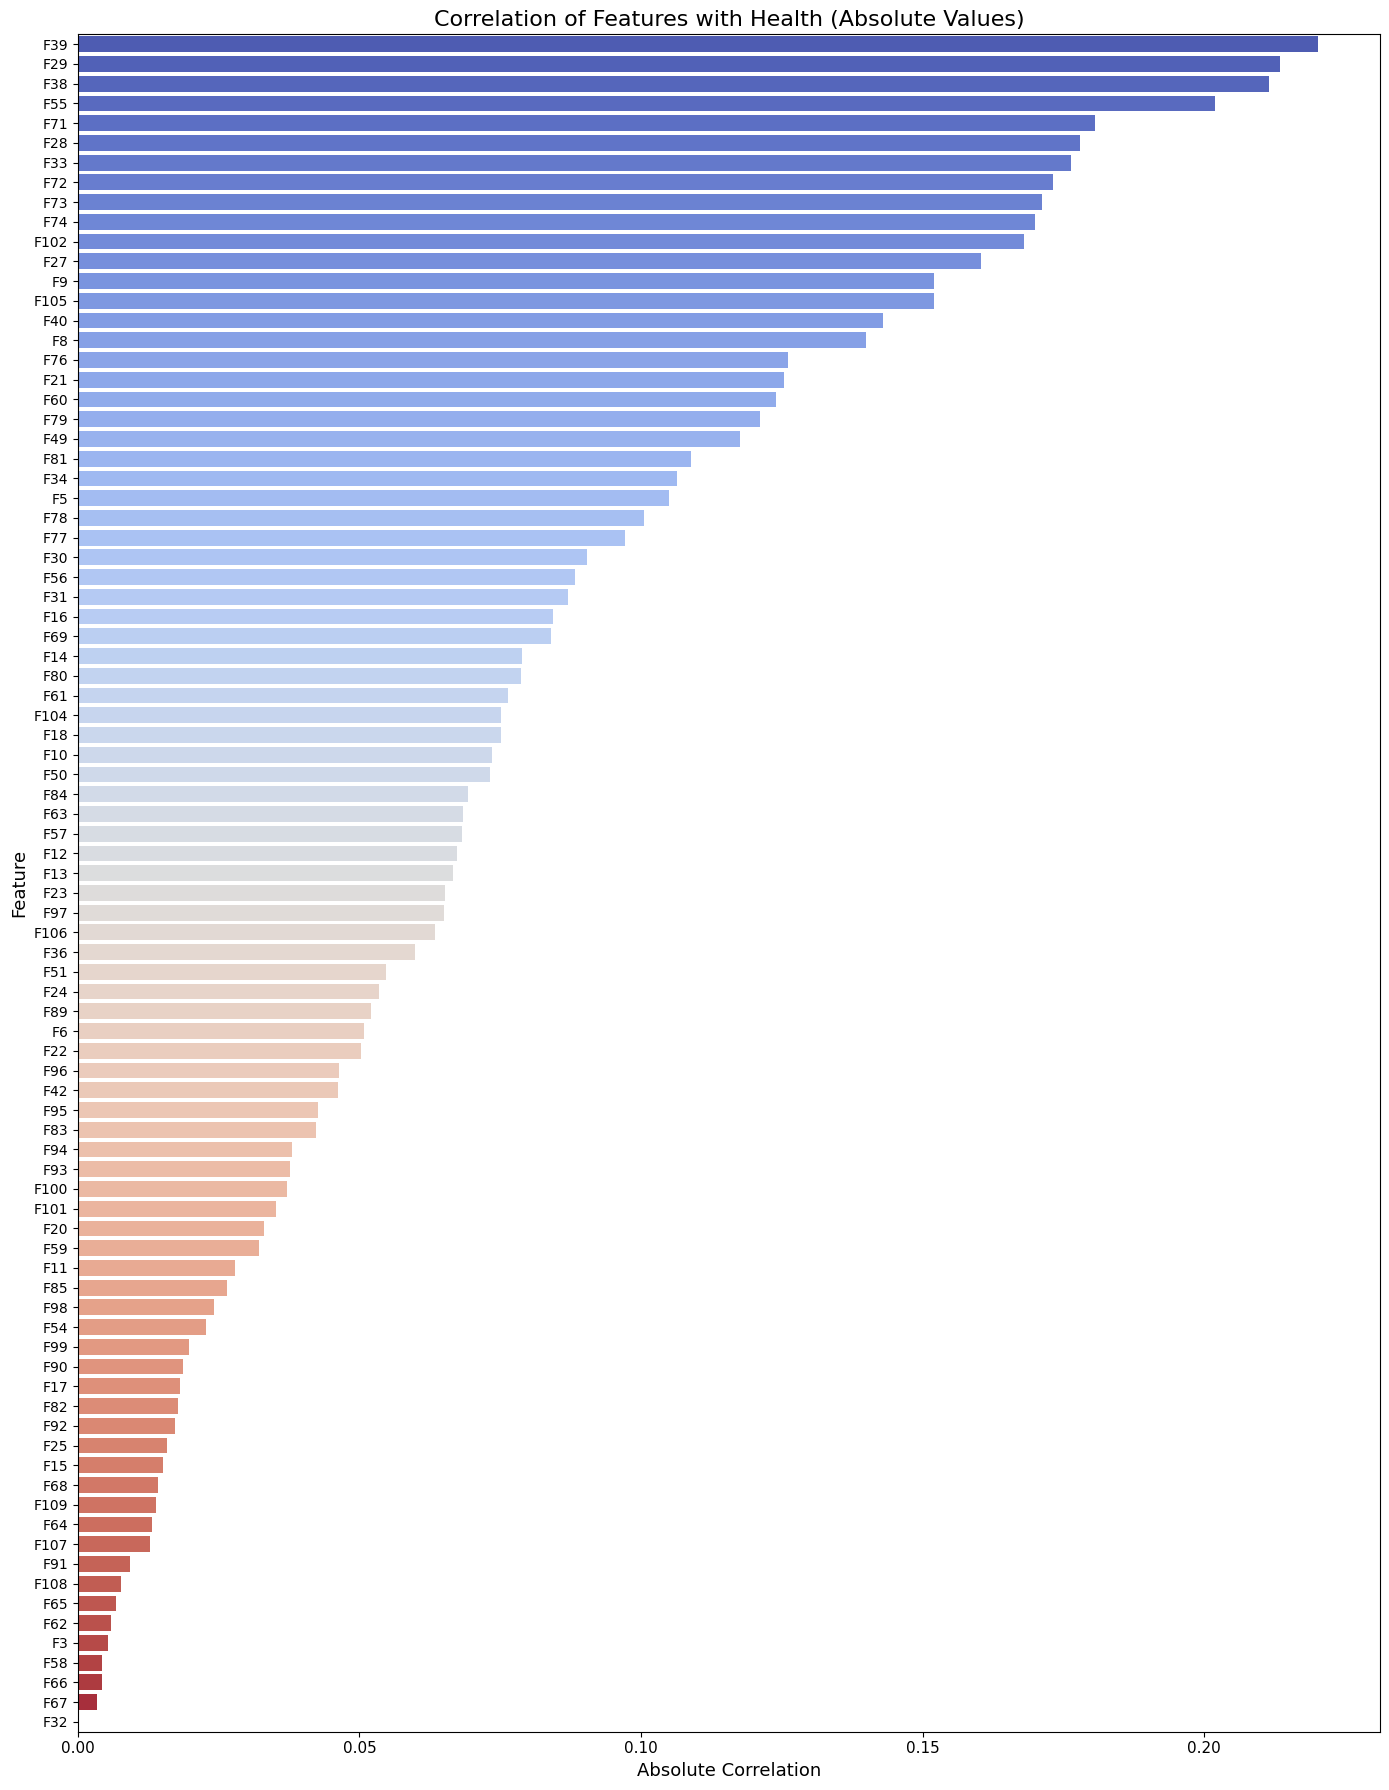

In [16]:
file_path = r"Reef_Health_CorrelationFiltered.xlsx"
df_filtered = pd.read_excel(file_path)

# Calculate correlation
feature_corr = df_filtered.corr()["Health"].drop("Health").abs().sort_values(ascending=False)

# Increase figure height for better vertical spacing
plt.figure(figsize=(14, 18))  # Increase height from 6 to 18
sns.barplot(x=feature_corr.values, y=feature_corr.index, palette="coolwarm")

# Customize plot aesthetics
plt.title("Correlation of Features with Health (Absolute Values)", fontsize=16)
plt.xlabel("Absolute Correlation", fontsize=13)
plt.ylabel("Feature", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### End prep

**Top 5 correlated Features**

In [9]:
top_5_features_corr = correlation_matrix["Health"].abs().sort_values(ascending=False).index[1:6] 
print("Top 5 Most Correlated Features with Health:")
print(top_5_features_corr)

Top 5 Most Correlated Features with Health:
Index(['F1', 'F39', 'F29', 'F38', 'F37'], dtype='object')


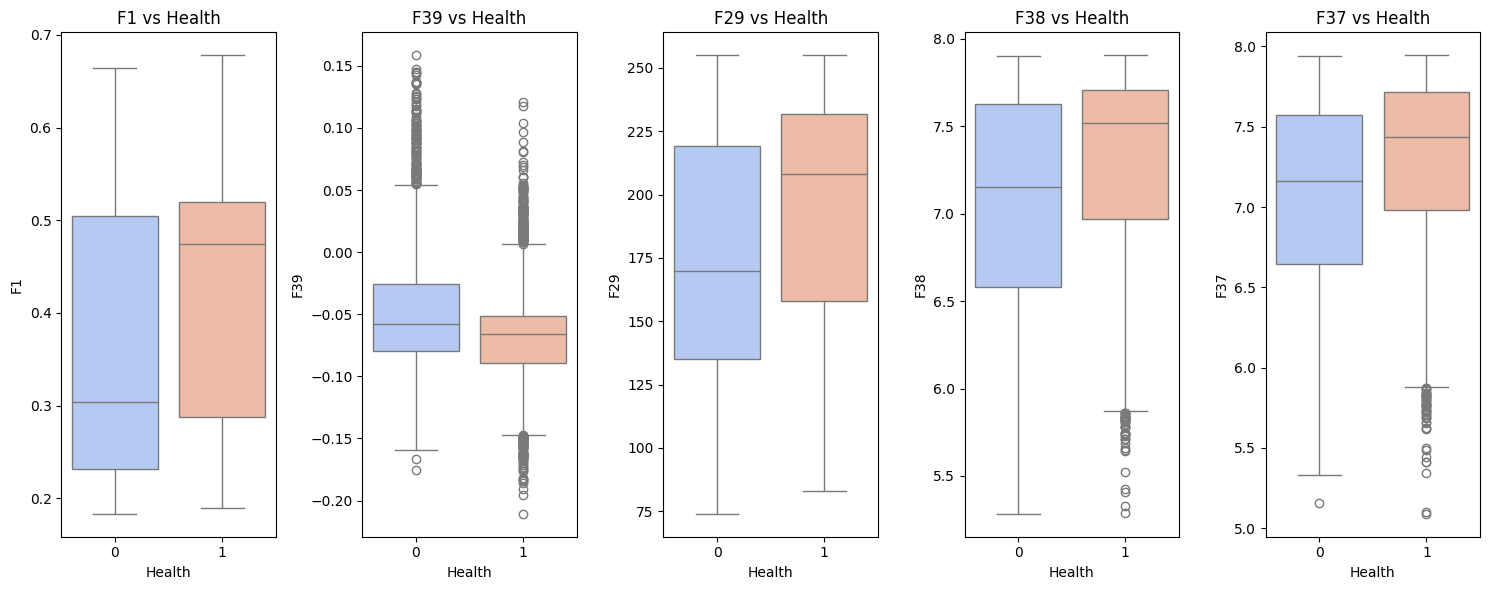

In [10]:
plt.figure(figsize=(15, 6))
for i, feature in enumerate(top_5_features_corr):
    plt.subplot(1, 5, i+1)
    sns.boxplot(x=df["Health"], y=df[feature], palette="coolwarm")
    plt.title(f"{feature} vs Health")
plt.tight_layout()
plt.show()

In [11]:
Least_20_features_corr = correlation_matrix["Health"].abs().sort_values(ascending=True).index[1:21]  # Exclude "Health" itself
print("Top 20 Least Correlated Features with Health:")
print(Least_20_features_corr)

Top 20 Least Correlated Features with Health:
Index(['F66', 'F58', 'F3', 'F62', 'F65', 'F108', 'F91', 'F48', 'F107', 'F64',
       'F109', 'F68', 'F15', 'F25', 'F92', 'F82', 'F17', 'F90', 'F99', 'F54'],
      dtype='object')


In [12]:
top_20_features_corr = correlation_matrix["Health"].abs().sort_values(ascending=False).index[1:21]  # Exclude "Health" itself
print("Top 20 Most Correlated Features with Health:")
print(top_20_features_corr)

Top 20 Most Correlated Features with Health:
Index(['F1', 'F39', 'F29', 'F38', 'F37', 'F70', 'F55', 'F52', 'F71', 'F28',
       'F33', 'F72', 'F73', 'F74', 'F102', 'F27', 'F41', 'F9', 'F105', 'F40'],
      dtype='object')


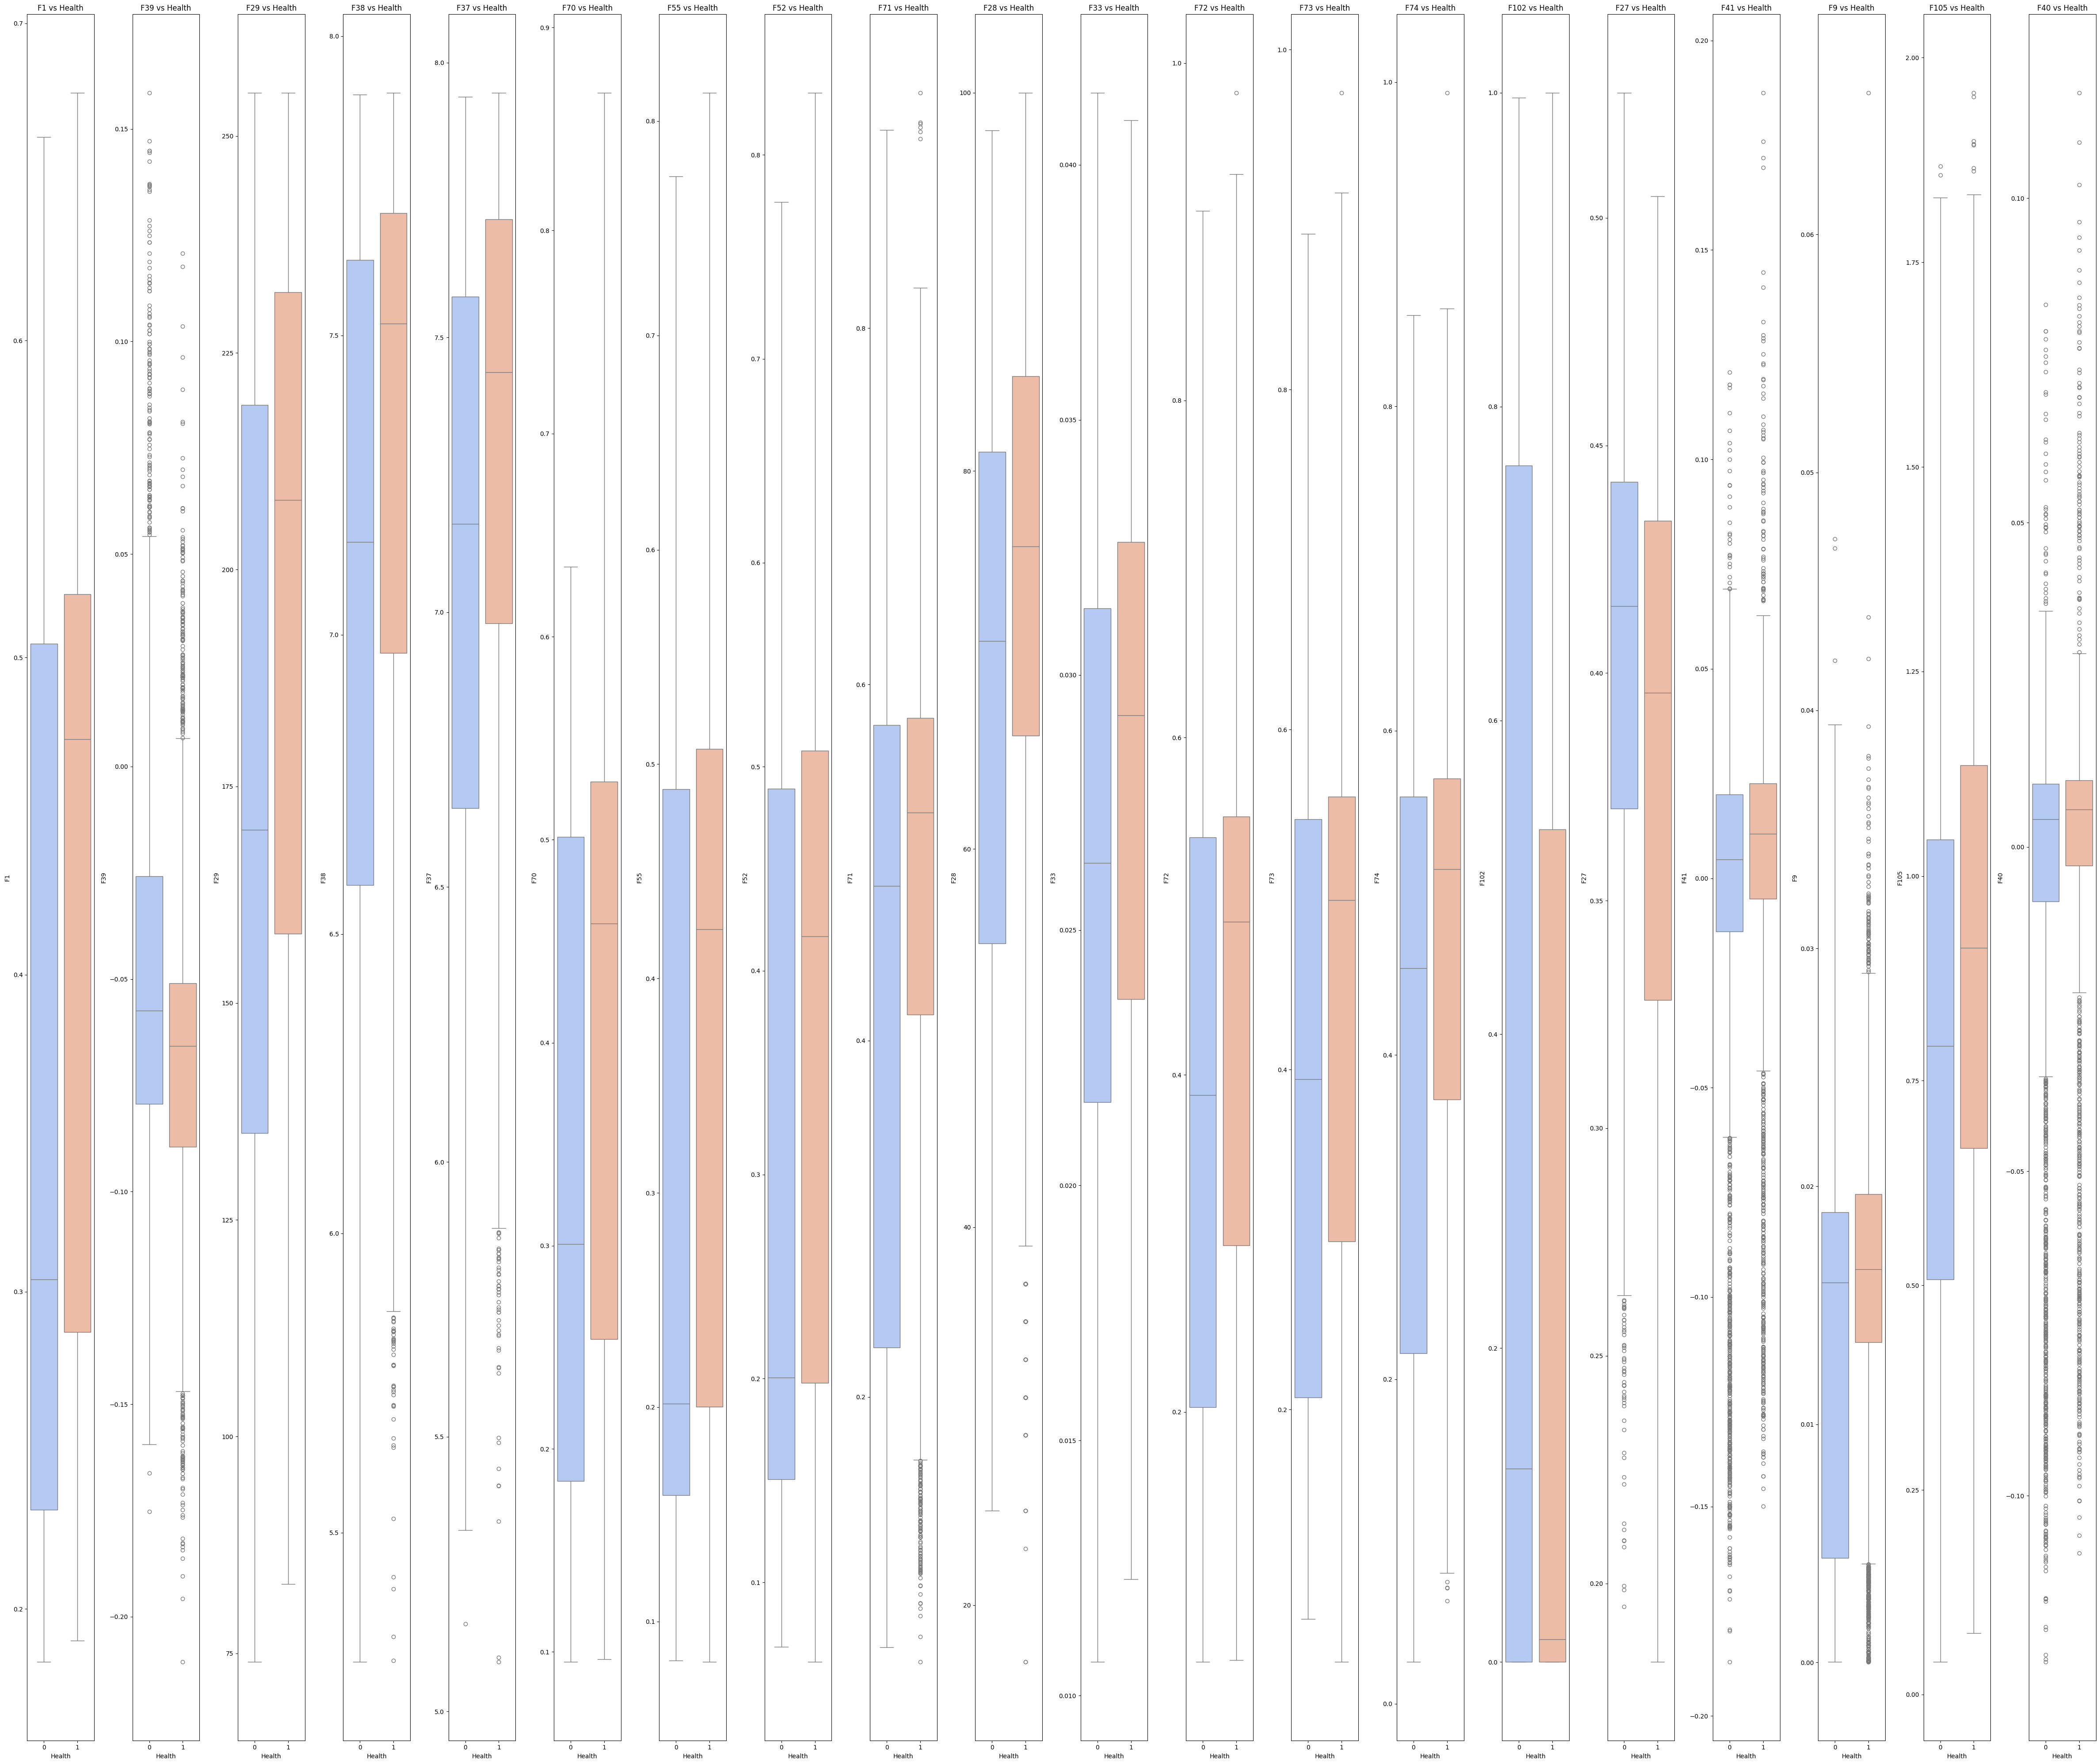

In [13]:
plt.figure(figsize=(50, 40))
for i, feature in enumerate(top_20_features_corr):
    plt.subplot(1, 21, i+1)
    sns.boxplot(x=df["Health"], y=df[feature], palette="coolwarm")
    plt.title(f"{feature} vs Health")
plt.tight_layout()
plt.show()

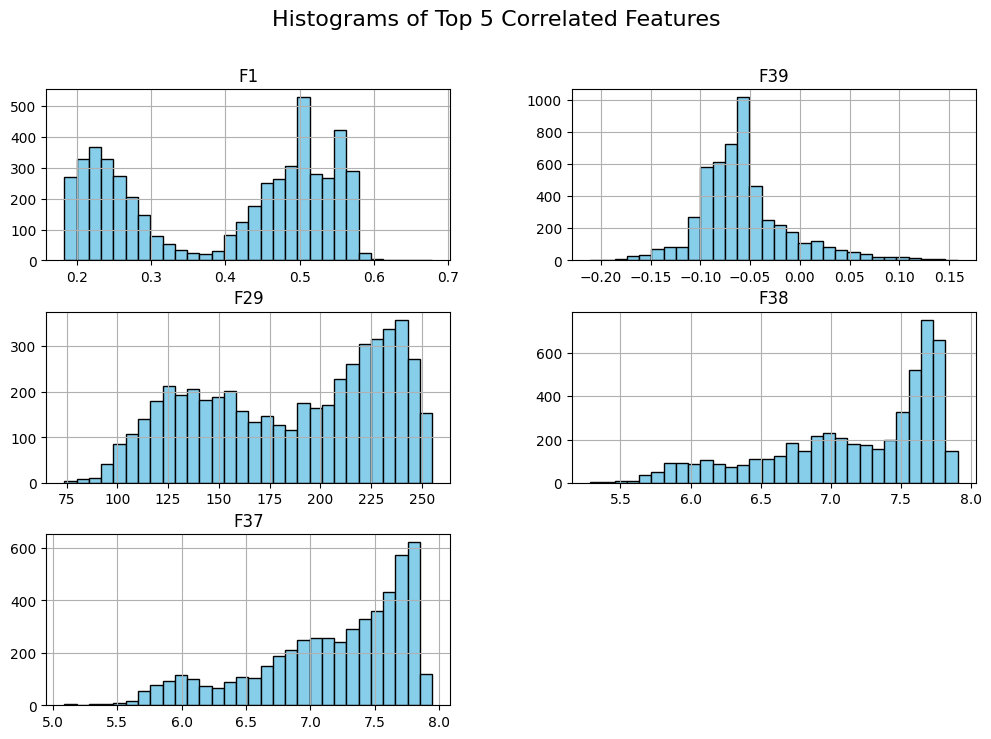

In [16]:
df[top_5_features_corr].hist(bins=30, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Top 5 Correlated Features", fontsize=16)
plt.show()

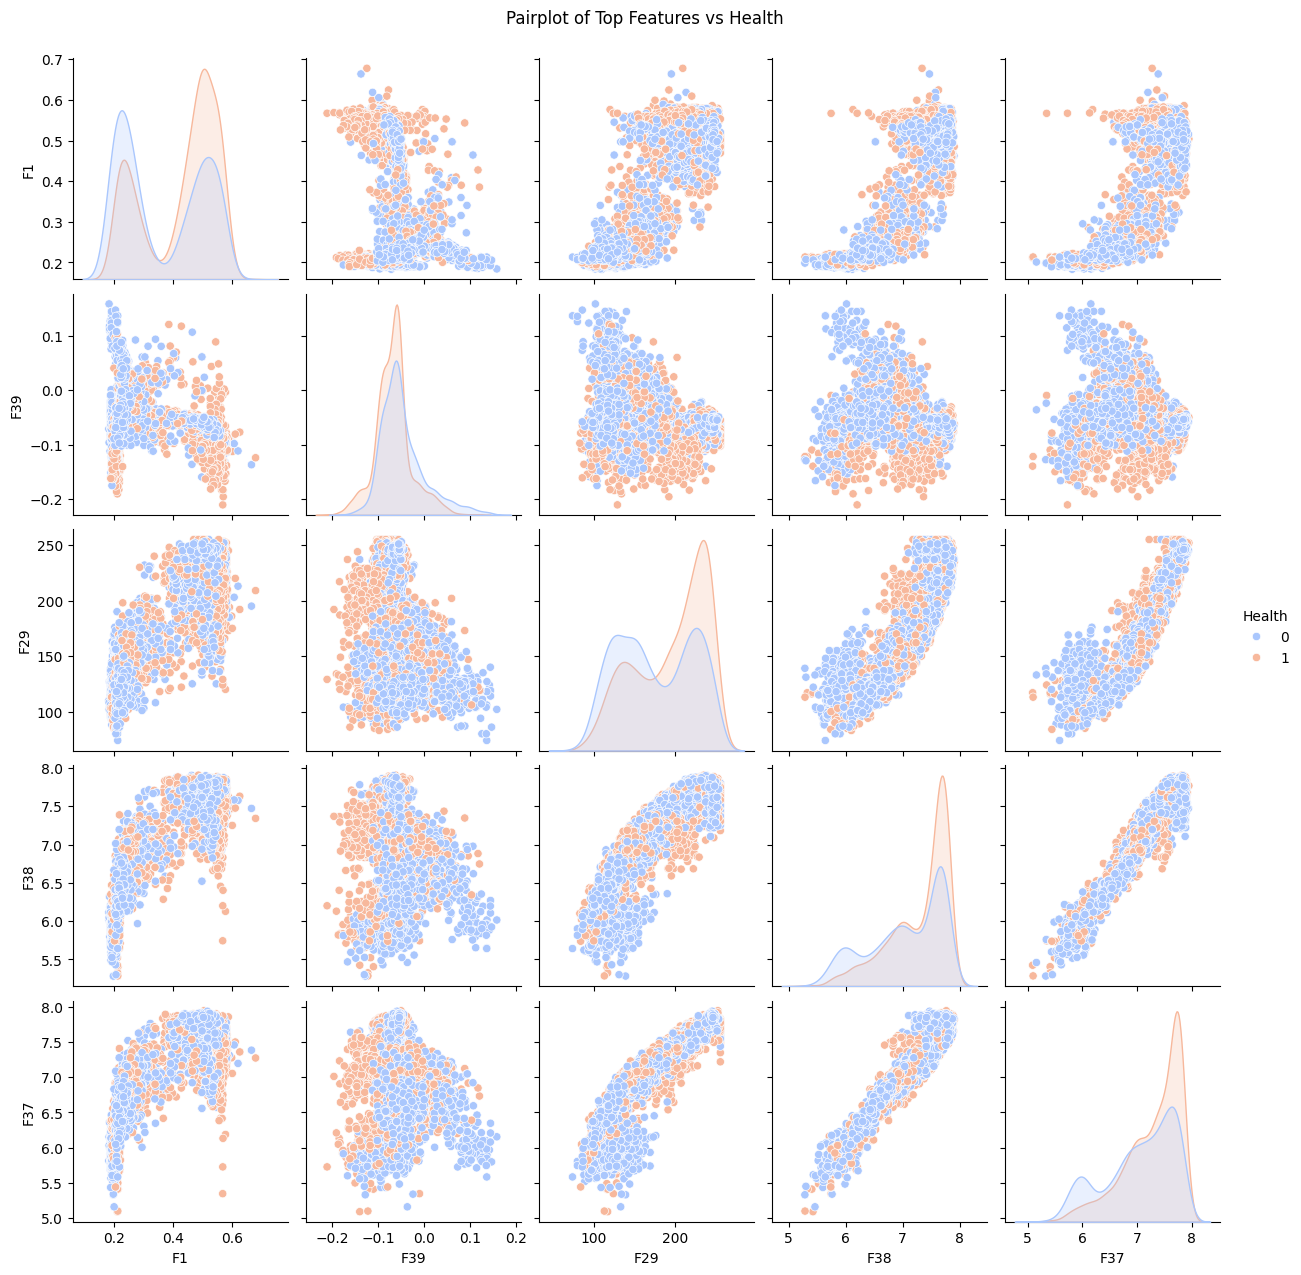

In [17]:
pairplot_df = df[top_5_features_corr.to_list() + ["Health"]].select_dtypes(include=[np.number]).dropna()

sns.pairplot(pairplot_df, hue="Health", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Top Features vs Health", y=1.02)
plt.show()

## Top 5 features based on Random forest

#### Random Forest Classifiers to measure feature importance

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

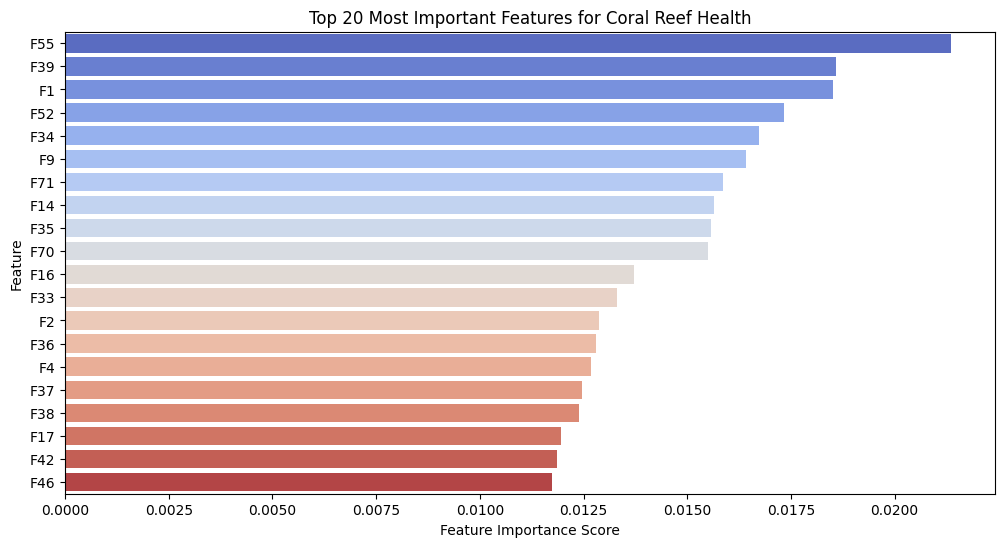


Top 20 Most Important Features:
   Feature  Importance
54     F55    0.021353
38     F39    0.018598
0       F1    0.018506
51     F52    0.017336
33     F34    0.016718
8       F9    0.016416
70     F71    0.015871
13     F14    0.015643
34     F35    0.015562
69     F70    0.015504
15     F16    0.013720
32     F33    0.013317
1       F2    0.012868
35     F36    0.012801
3       F4    0.012692
36     F37    0.012458
37     F38    0.012384
16     F17    0.011949
41     F42    0.011865
45     F46    0.011738
   Feature  Importance
54     F55    0.021353
38     F39    0.018598
0       F1    0.018506
51     F52    0.017336
33     F34    0.016718
..     ...         ...
58     F59    0.001303
24     F25    0.001245
12     F13    0.000703
64     F65    0.000557
31     F32    0.000000

[109 rows x 2 columns]


In [19]:
# Prepare Data for Feature Importance Analysis
X = df.drop(columns=["Health"])  # All features except target
y = df["Health"]  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get Feature Importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot Top 20 Important Features
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances[:20], palette="coolwarm")
plt.title("Top 20 Most Important Features for Coral Reef Health")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top 20 important features
print("\nTop 20 Most Important Features:")
print(feature_importances[:20])
print(feature_importances)

In [20]:
# Load the filtered feature list (86 features retained after correlation filtering)
filtered_path = r"Reef_Health_CorrelationFiltered.xlsx"
df_filtered_86features = pd.read_excel(filtered_path)

# Extract the retained feature names (exclude 'Health')
filtered_features = [col for col in df_filtered_86features.columns if col != "Health"]

# Filter the original importance scores to keep only the retained features
filtered_importances = feature_importances[feature_importances["Feature"].isin(filtered_features)]

# Sort again for clarity
filtered_importances = filtered_importances.sort_values(by="Importance", ascending=False)

# Display the top few
print(filtered_importances.head())

# Optional: Save to Excel
filtered_importances.to_excel(r"Feature_Importances_Filtered.xlsx", index=False)

   Feature  Importance
54     F55    0.021353
38     F39    0.018598
33     F34    0.016718
8       F9    0.016416
70     F71    0.015871


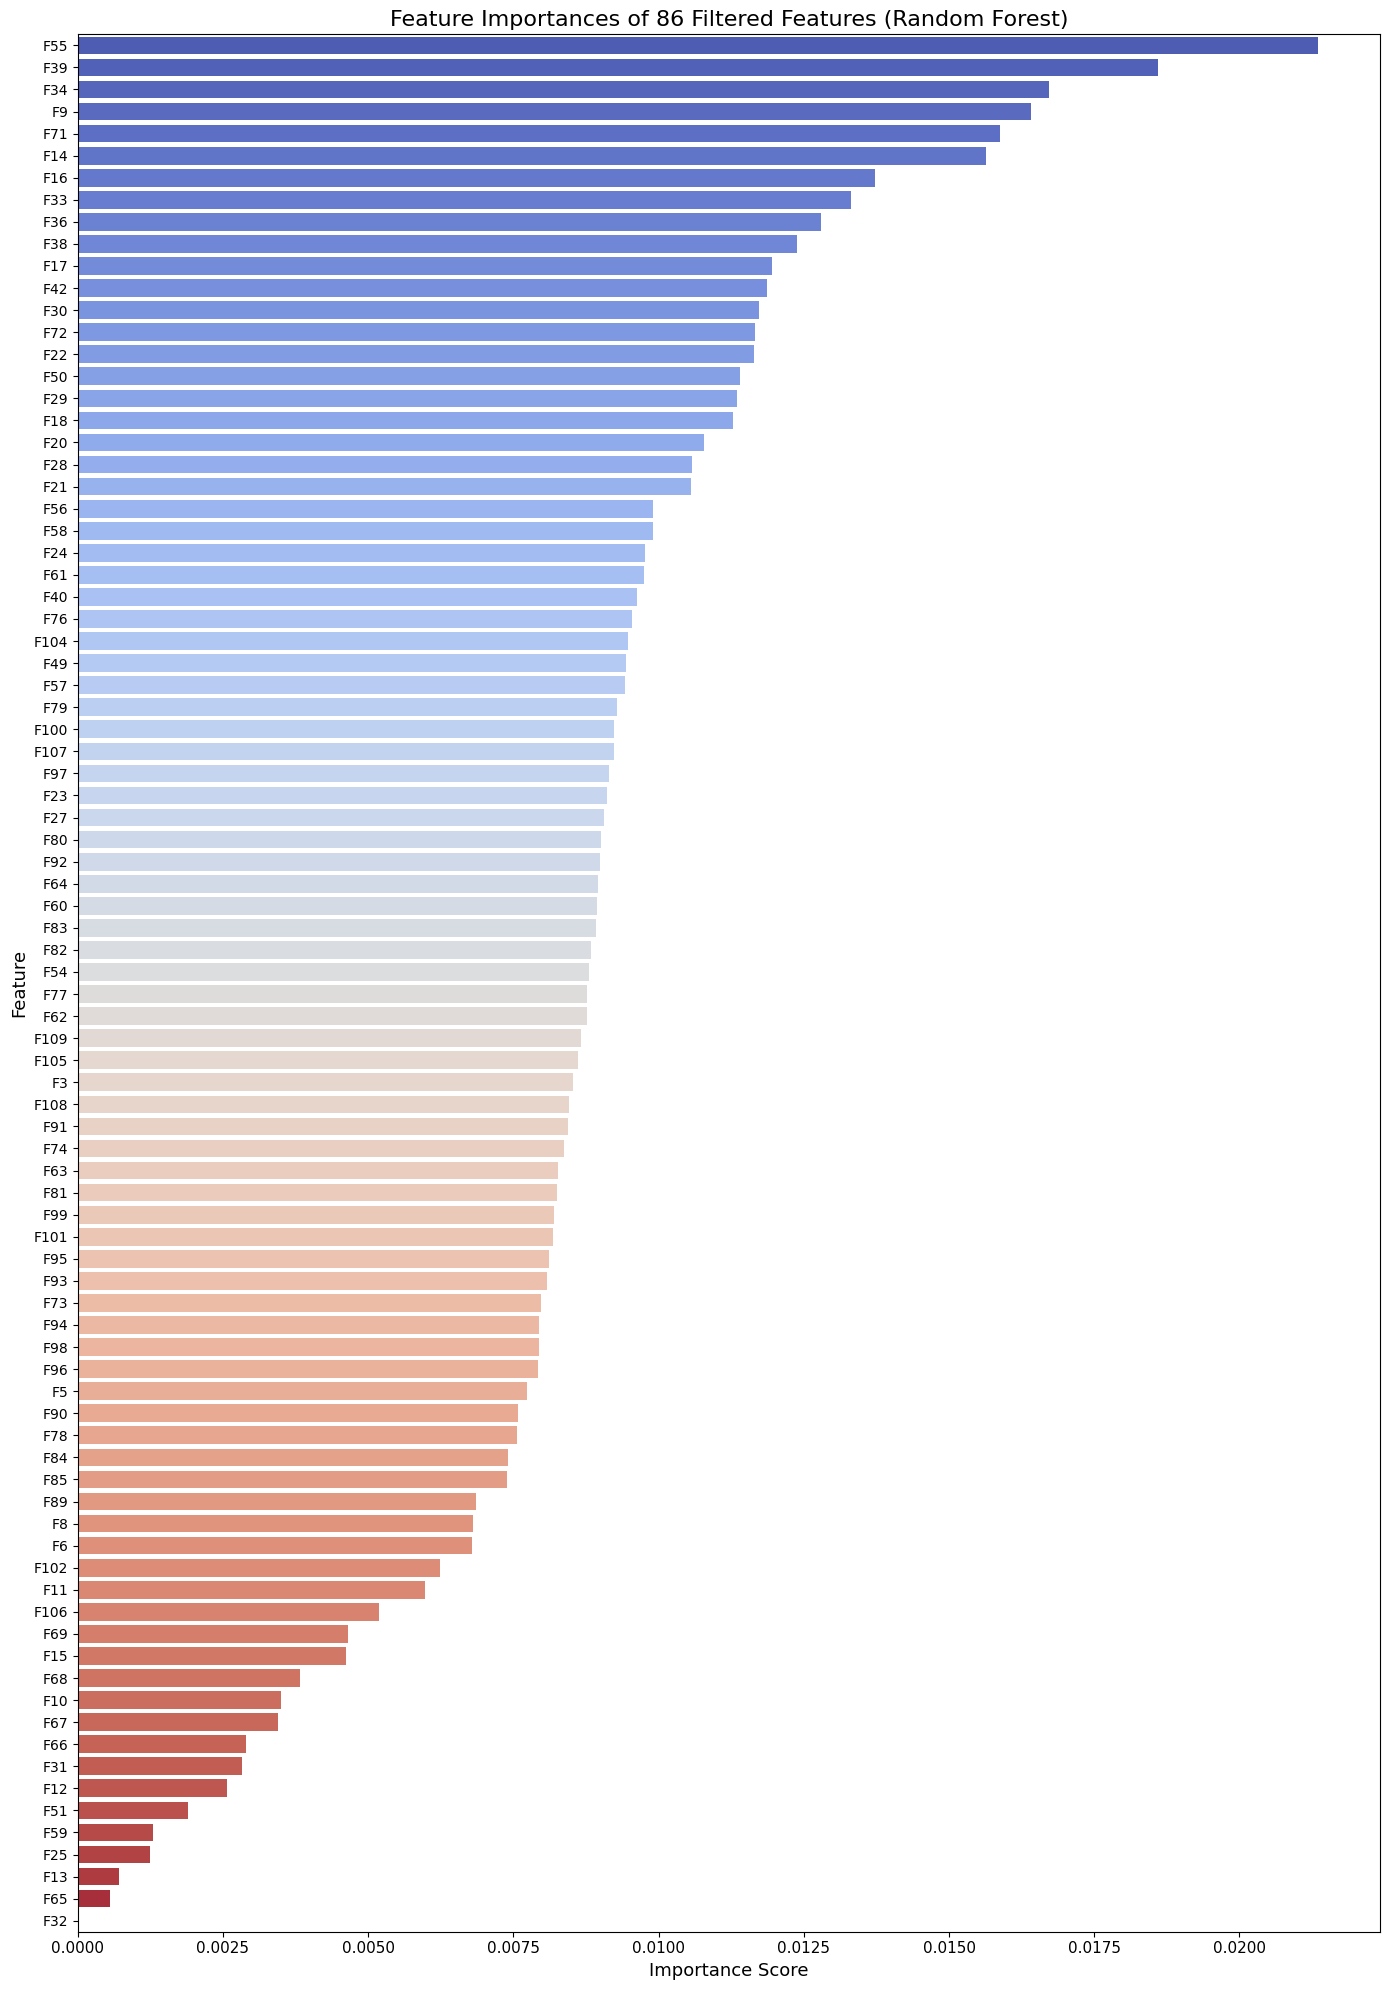

In [21]:
# Plot all 86 features by importance
plt.figure(figsize=(14, 20))  # Increase height for better visibility
sns.barplot(x="Importance", y="Feature", data=filtered_importances, palette="coolwarm")

# Chart labels and title
plt.title("Feature Importances of 86 Filtered Features (Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=13)
plt.ylabel("Feature", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

   Feature  Importance
54     F55    0.021353
38     F39    0.018598
0       F1    0.018506
51     F52    0.017336
33     F34    0.016718
..     ...         ...
58     F59    0.001303
24     F25    0.001245
12     F13    0.000703
64     F65    0.000557
31     F32    0.000000

[109 rows x 2 columns]


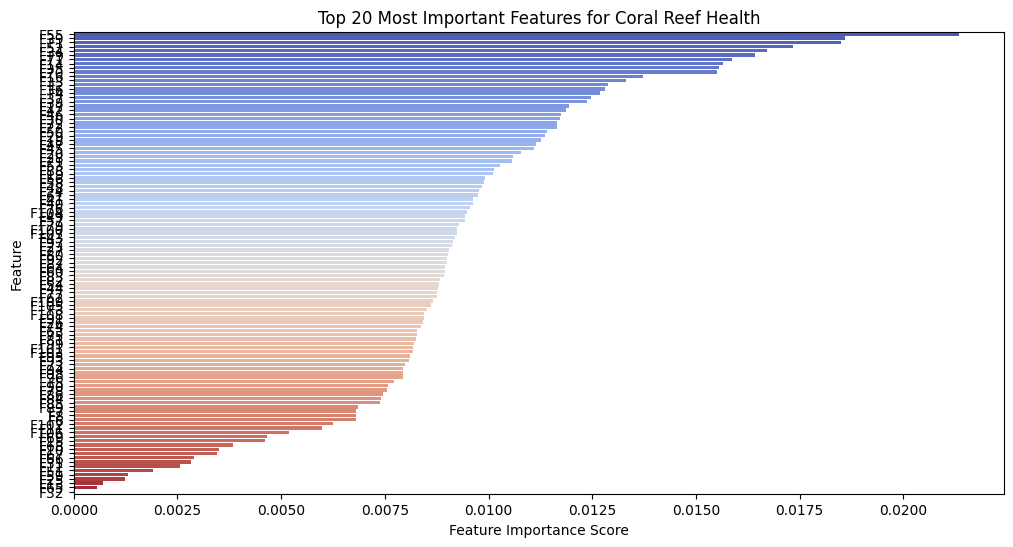

In [22]:
print(feature_importances)

# Plot Top 20 Important Features
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="coolwarm")
plt.title("Top 20 Most Important Features for Coral Reef Health")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

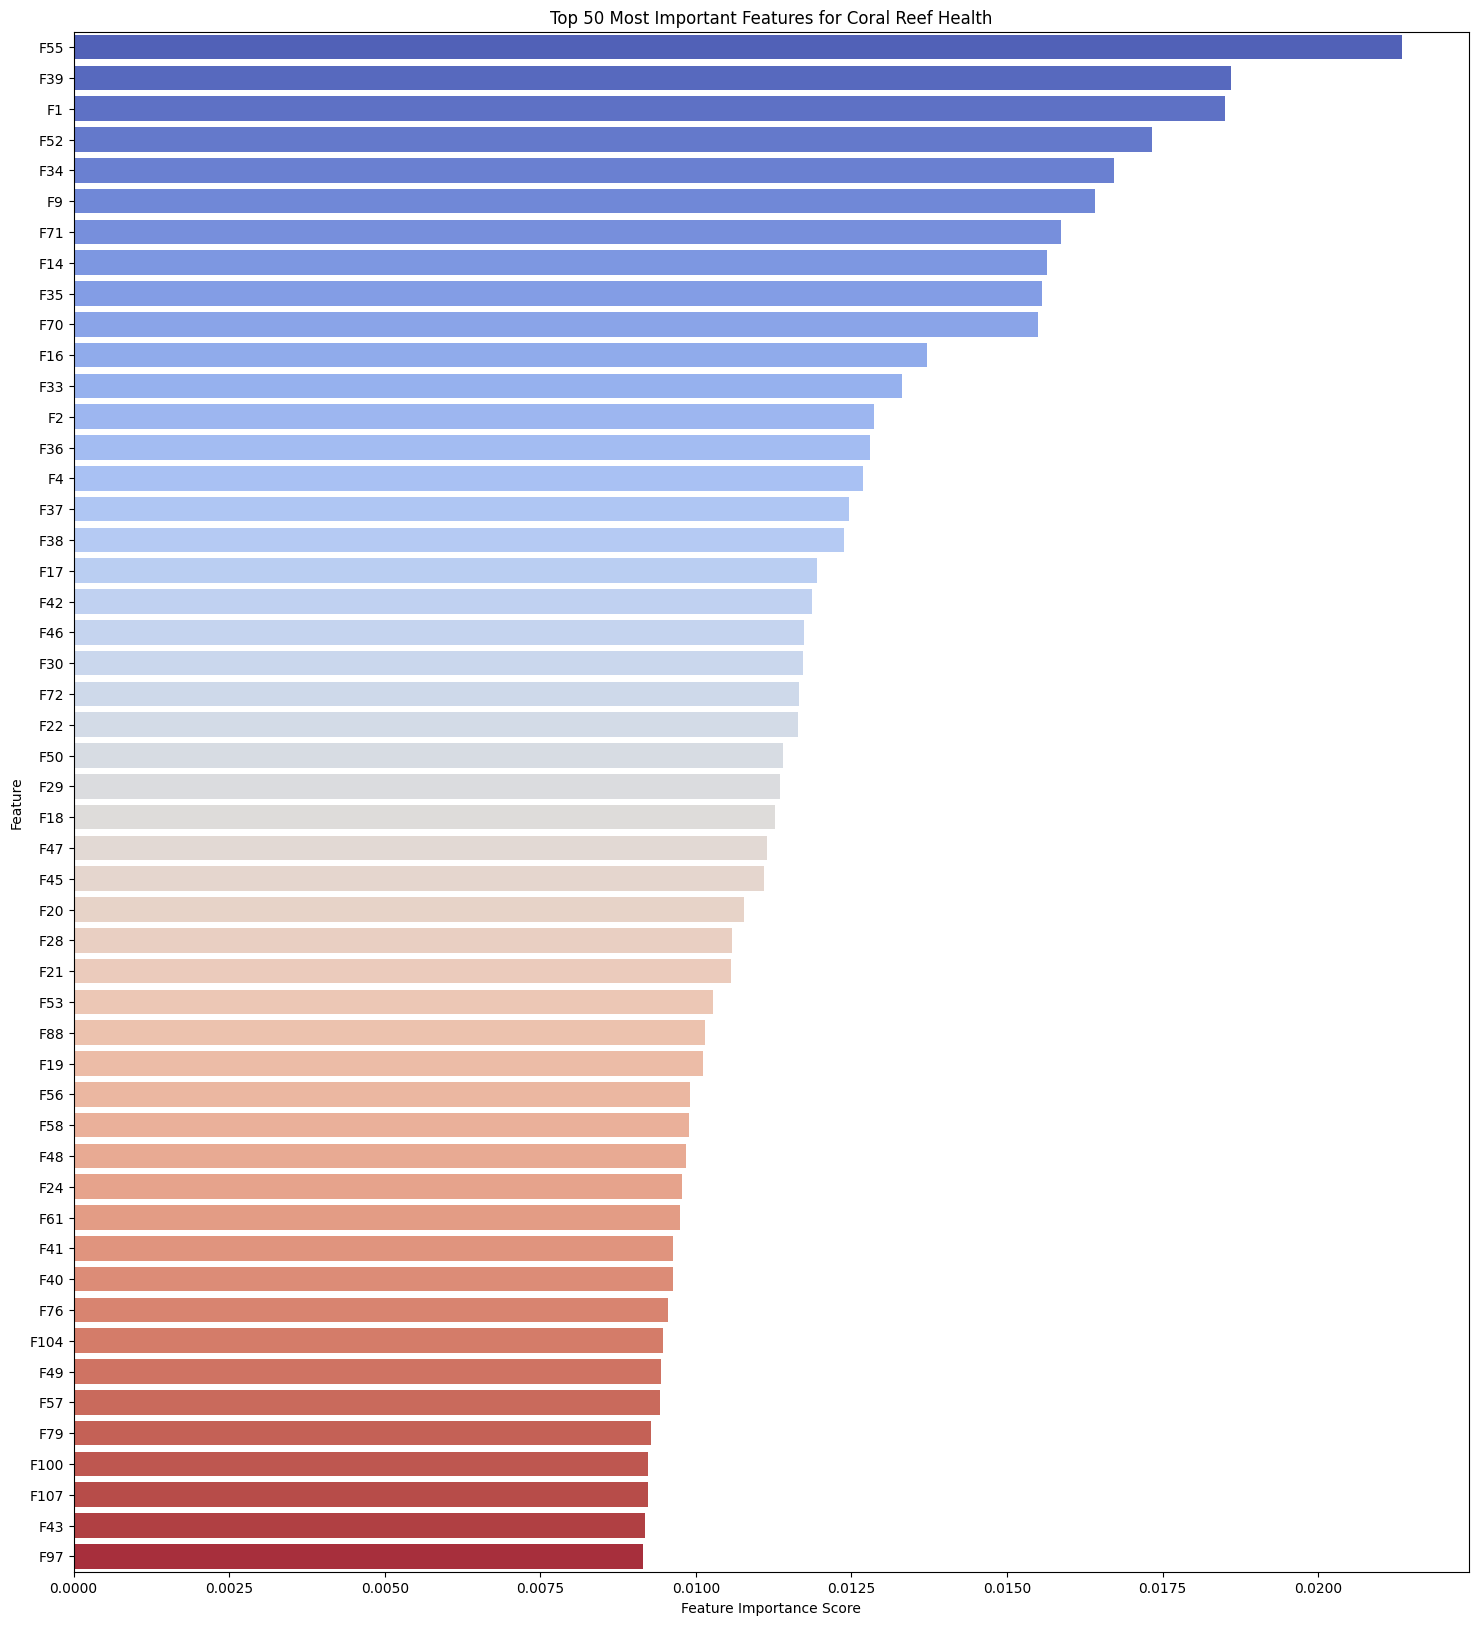


Top 50 Most Important Features:
    Feature  Importance
54      F55    0.021353
38      F39    0.018598
0        F1    0.018506
51      F52    0.017336
33      F34    0.016718
8        F9    0.016416
70      F71    0.015871
13      F14    0.015643
34      F35    0.015562
69      F70    0.015504
15      F16    0.013720
32      F33    0.013317
1        F2    0.012868
35      F36    0.012801
3        F4    0.012692
36      F37    0.012458
37      F38    0.012384
16      F17    0.011949
41      F42    0.011865
45      F46    0.011738
29      F30    0.011723
71      F72    0.011655
21      F22    0.011647
49      F50    0.011404
28      F29    0.011353
17      F18    0.011275
46      F47    0.011141
44      F45    0.011091
19      F20    0.010781
27      F28    0.010580
20      F21    0.010562
52      F53    0.010278
87      F88    0.010143
18      F19    0.010117
55      F56    0.009908
57      F58    0.009895
47      F48    0.009848
23      F24    0.009769
60      F61    0.009752
40     

In [23]:
# Plot Top 50 Important Features
plt.figure(figsize=(18, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importances[:50], palette="coolwarm")
plt.title("Top 50 Most Important Features for Coral Reef Health")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top 50 important features
print("\nTop 50 Most Important Features:")
print(feature_importances[:50])

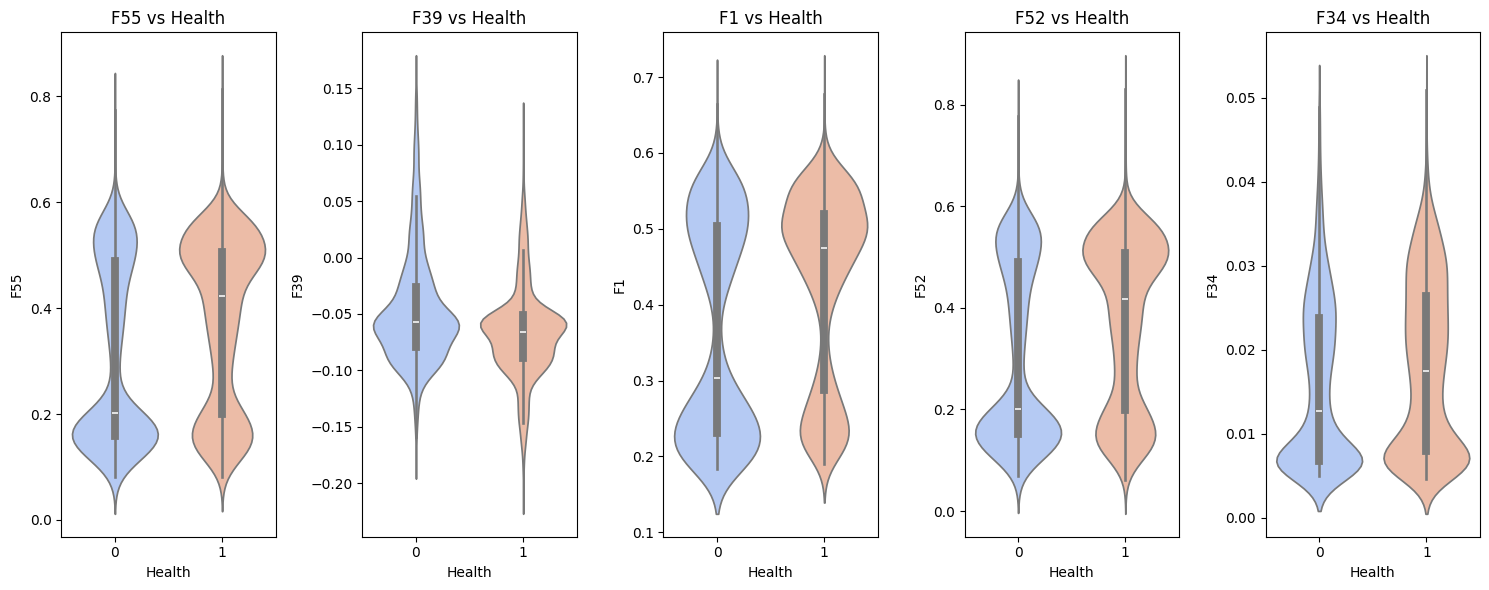

In [24]:
top_5_features_forest = feature_importances["Feature"][:5]

# Plot Violin Plots
plt.figure(figsize=(15, 6))
for i, feature in enumerate(top_5_features_forest):
    plt.subplot(1, 5, i+1)
    sns.violinplot(x=df["Health"], y=df[feature], palette="coolwarm")
    plt.title(f"{feature} vs Health")
plt.tight_layout()
plt.show()

C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3398: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3398: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3398: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boonk\AppData\Local\Packages\Py

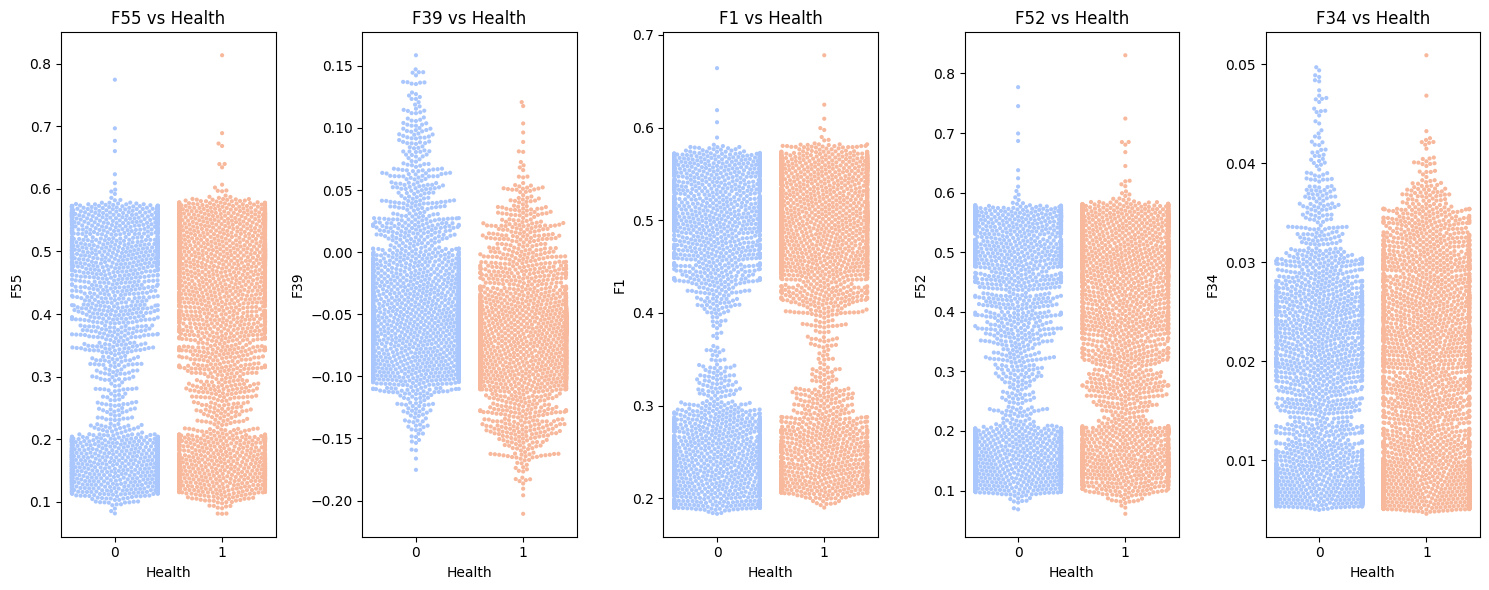

In [25]:
plt.figure(figsize=(15, 6))
for i, feature in enumerate(top_5_features_forest):
    plt.subplot(1, 5, i+1)
    sns.swarmplot(x=df["Health"], y=df[feature], palette="coolwarm", size=3)
    plt.title(f"{feature} vs Health")
plt.tight_layout()
plt.show()

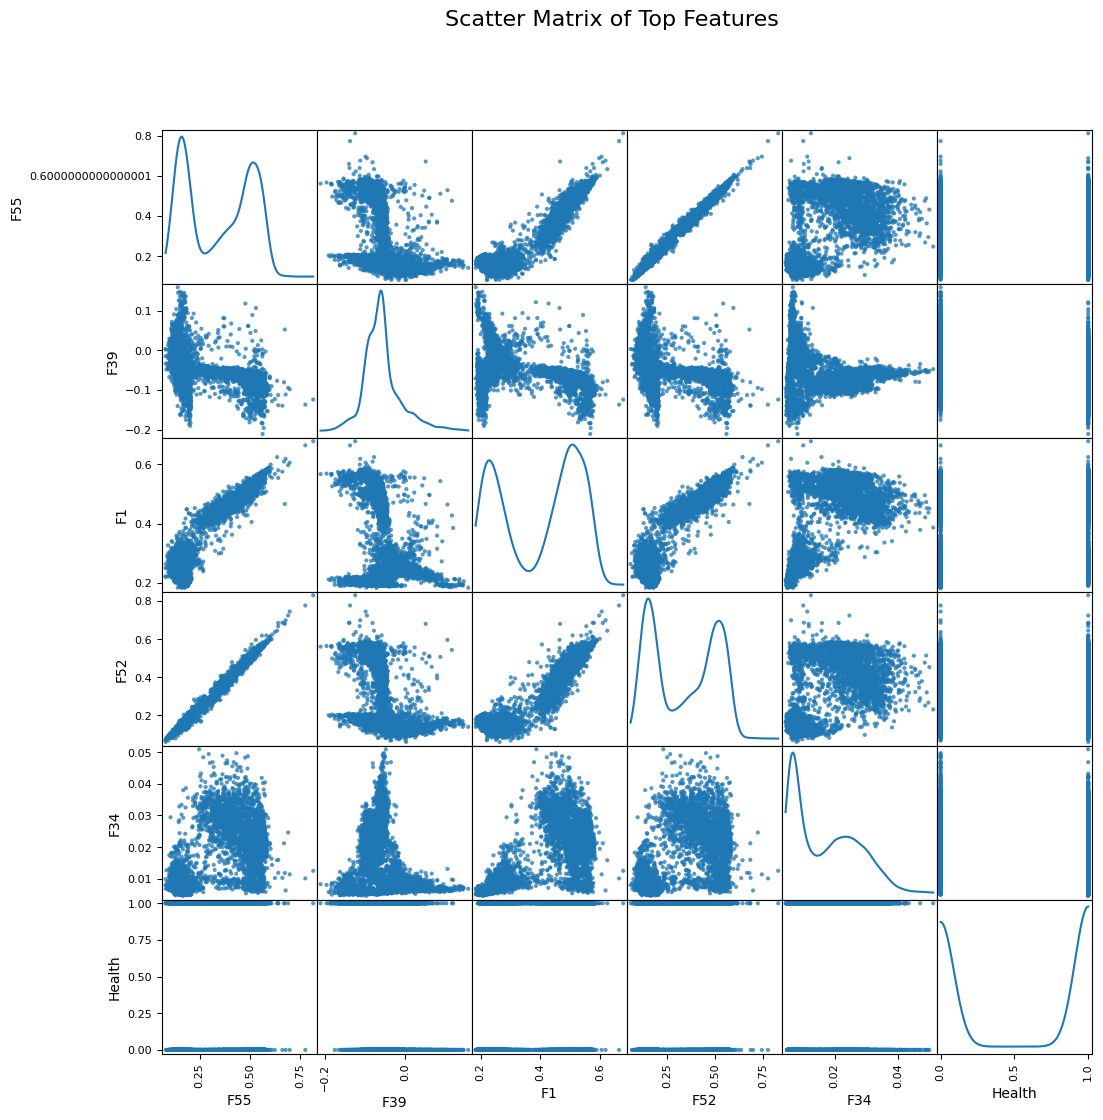

In [26]:
from pandas.plotting import scatter_matrix

# Select top 5 features
top_features_forest = list(feature_importances["Feature"][:5])

# Plot scatter matrix
scatter_matrix(df[top_features_forest + ["Health"]], figsize=(12, 12), alpha=0.75, diagonal="kde")
plt.suptitle("Scatter Matrix of Top Features", fontsize=16)
plt.show()


**We shall keep the top 20 features only**

In [26]:
# Select only the top 20 important features + Health column
top_20_features = [
    "F55", "F39", "F1", "F52", "F34", "F9", "F71", "F14", "F35", "F70",
    "F16", "F33", "F2", "F36", "F4", "F37", "F38", "F17", "F42", "F46"
]
df_top20 = df[top_20_features + ["Health"]]  # Keep target column

# Save the cleaned dataset
df_top20.to_excel(r"Reef_Health_Top20.xlsx", index=False)

print("Dataset updated! Kept only the Top 20 features.")


Dataset updated! Kept only the Top 20 features.


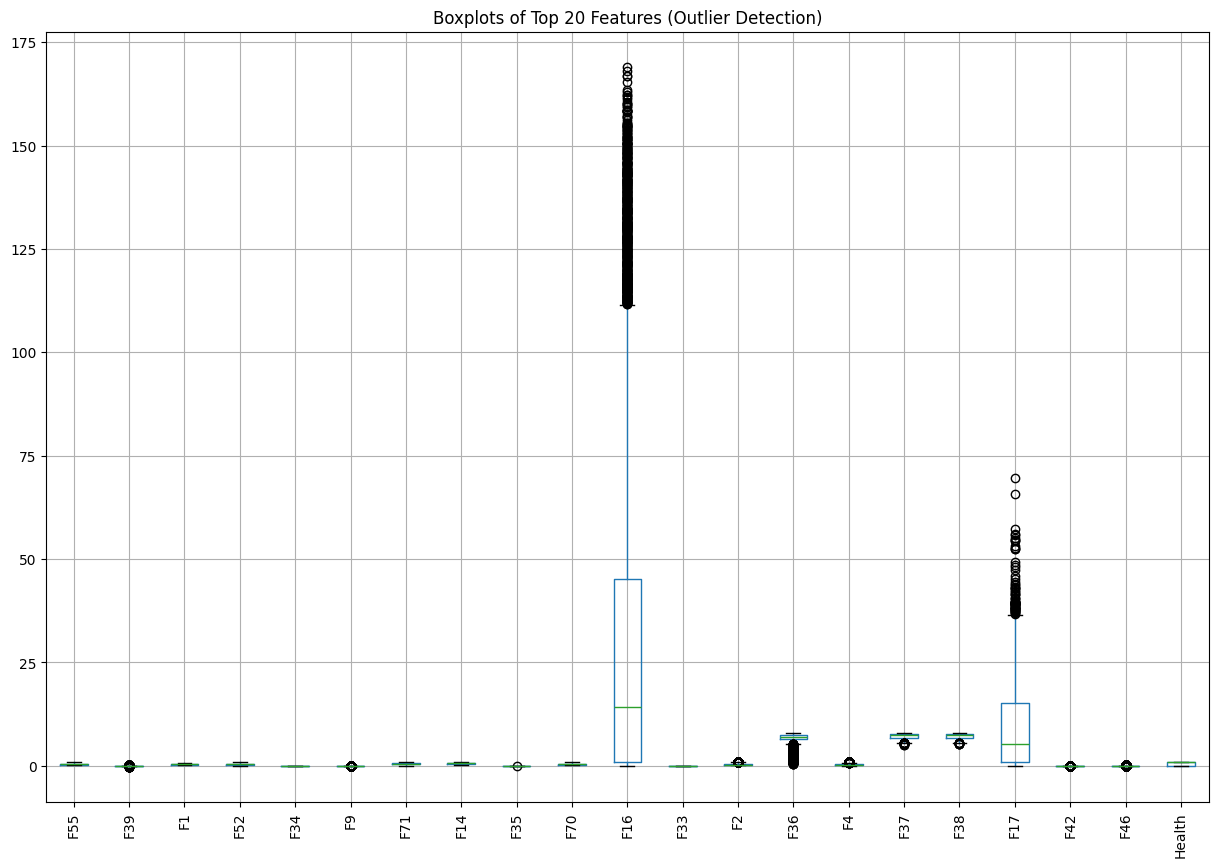

In [27]:
# Plot boxplots for all top 20 features
plt.figure(figsize=(15, 10))
df_top20.boxplot(rot=90)
plt.title("Boxplots of Top 20 Features (Outlier Detection)")
plt.show()

We would need to further normalize the features especially given the range of values F16 and F17 take.

In [ ]:
from sklearn.preprocessing import StandardScaler
features_to_scale = df_top20.columns[:-1]  # Exclude "Health" column
scaler = StandardScaler()
df_top20[features_to_scale] = scaler.fit_transform(df_top20[features_to_scale])
# Save the standardized dataset
df_top20.to_excel(r"Reef_Health_Top20_Standardized.xlsx", index=False)
print("Standardization (Z-score) applied! Dataset saved.")

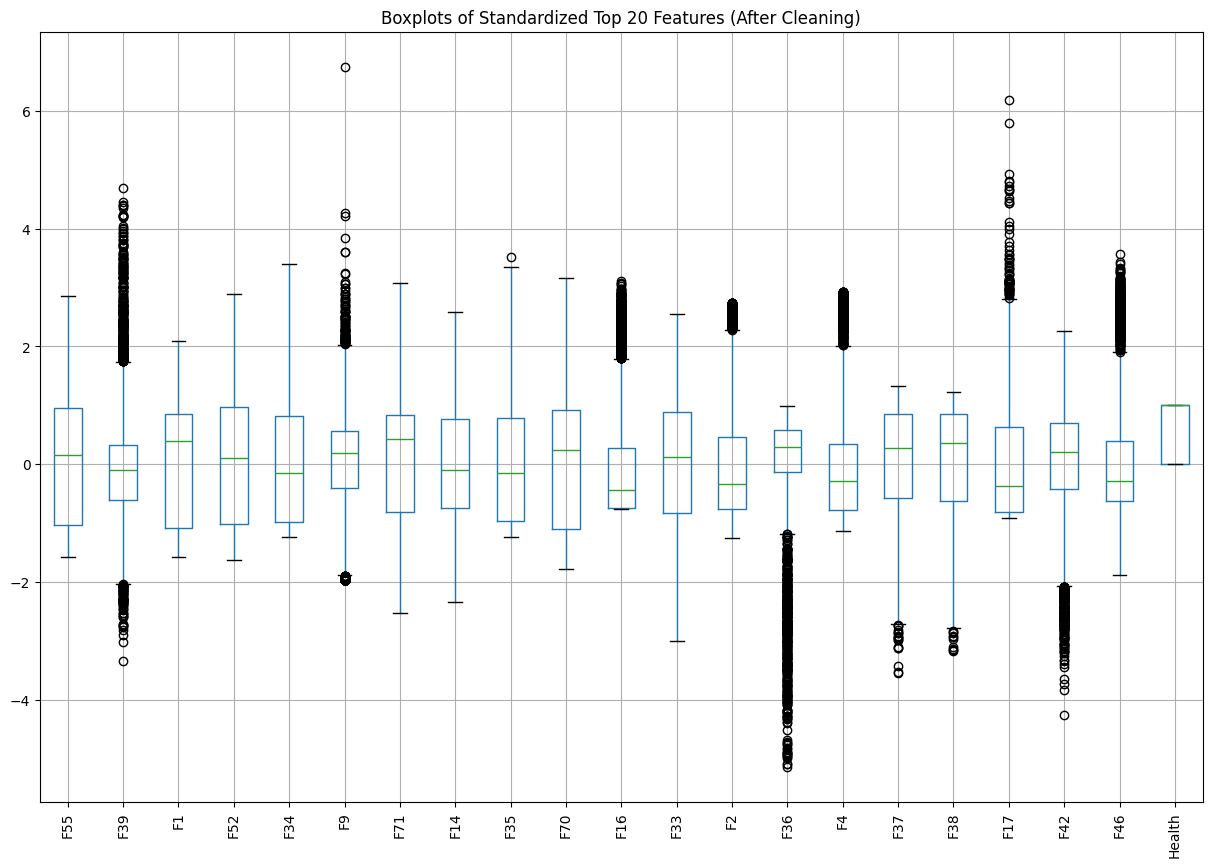

In [29]:
plt.figure(figsize=(15, 10))
df_top20.boxplot(rot=90)
plt.title("Boxplots of Standardized Top 20 Features (After Cleaning)")
plt.show()


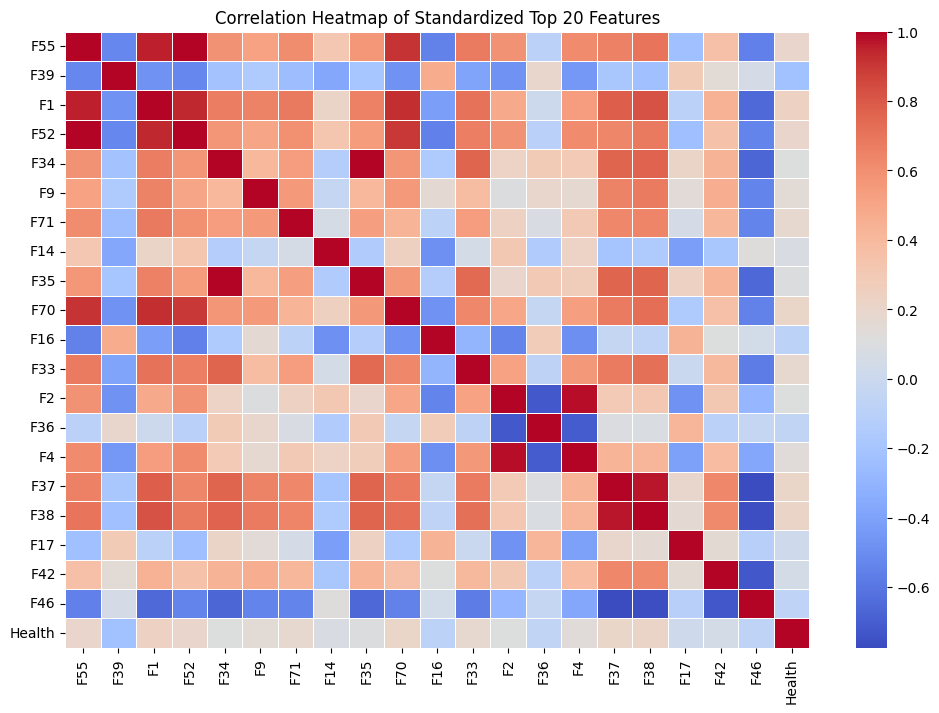

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_top20.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Standardized Top 20 Features")
plt.show()

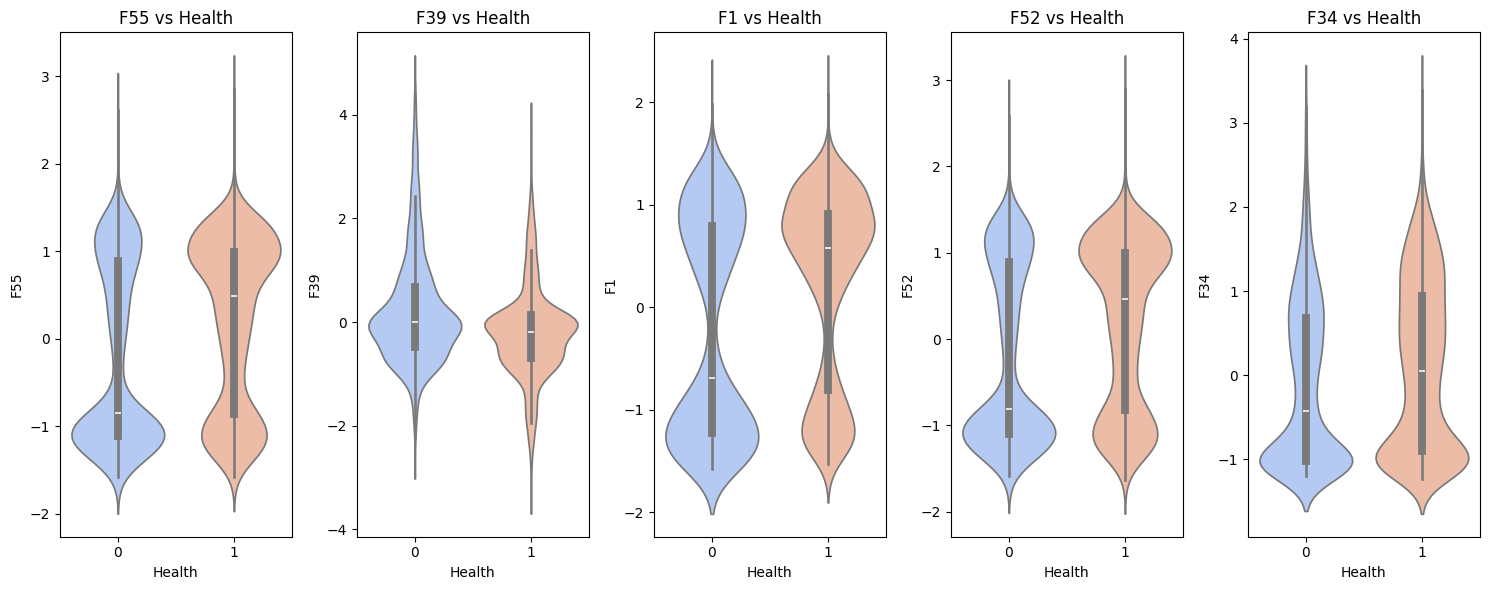

In [31]:
plt.figure(figsize=(15, 6))
for i, feature in enumerate(df_top20.columns[:-1][:5]):  # Select 5 features
    plt.subplot(1, 5, i+1)
    sns.violinplot(x=df_top20["Health"], y=df_top20[feature], palette="coolwarm")
    plt.title(f"{feature} vs Health")
plt.tight_layout()
plt.show()

C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3398: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3398: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3398: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\boonk\AppData\Local\Packages\Py

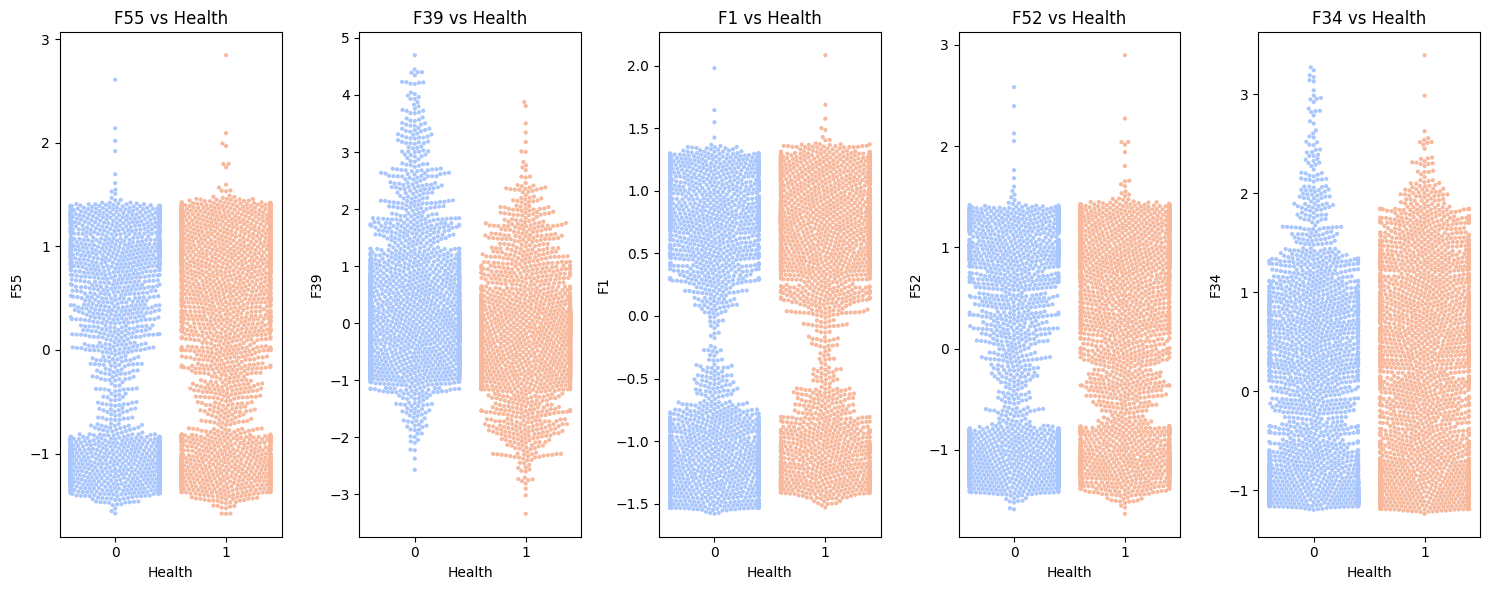

In [32]:
plt.figure(figsize=(15, 6))
for i, feature in enumerate(df_top20.columns[:-1][:5]):
    plt.subplot(1, 5, i+1)
    sns.swarmplot(x=df_top20["Health"], y=df_top20[feature], palette="coolwarm", size=3)
    plt.title(f"{feature} vs Health")
plt.tight_layout()
plt.show()

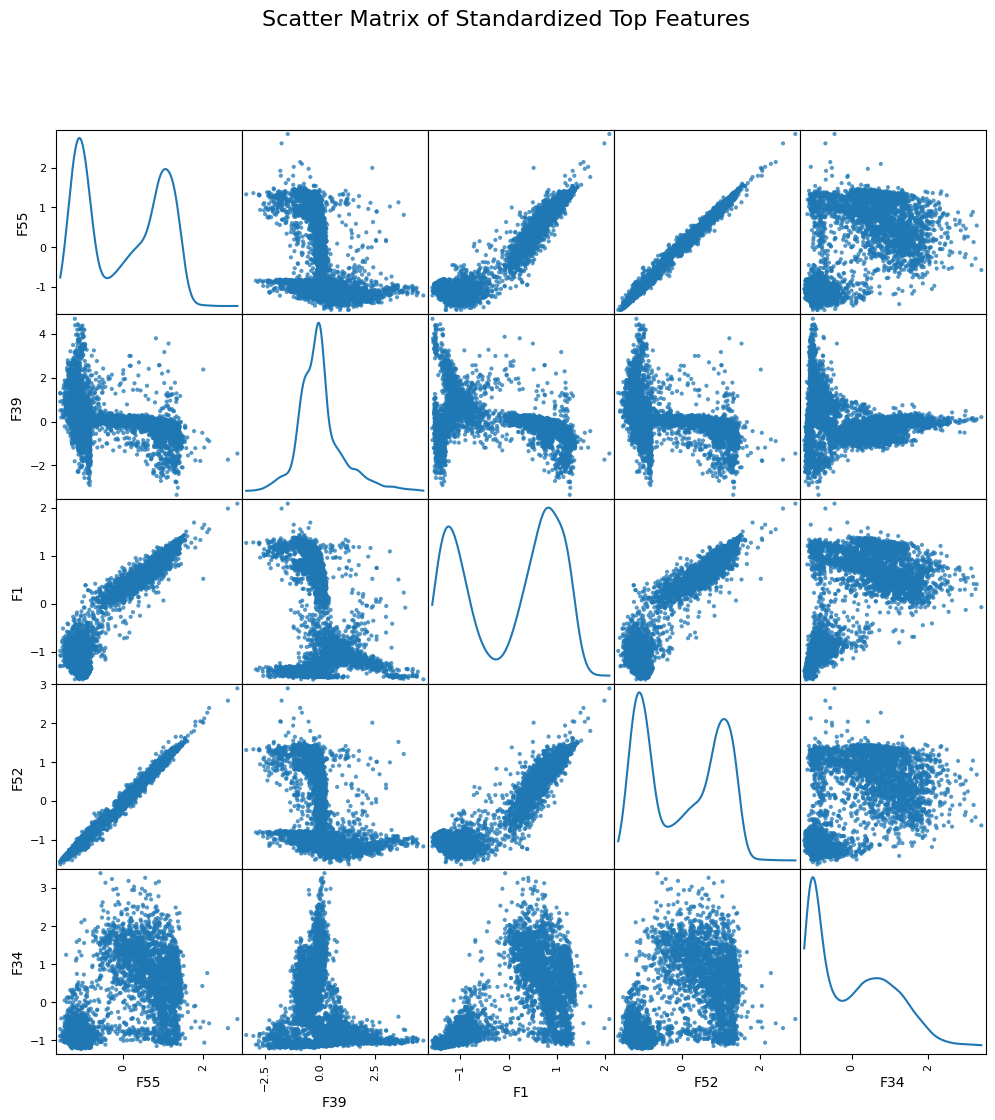

In [33]:
scatter_matrix(df_top20[df_top20.columns[:-1][:5]], figsize=(12, 12), alpha=0.75, diagonal="kde")
plt.suptitle("Scatter Matrix of Standardized Top Features", fontsize=16)
plt.show()

C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignor

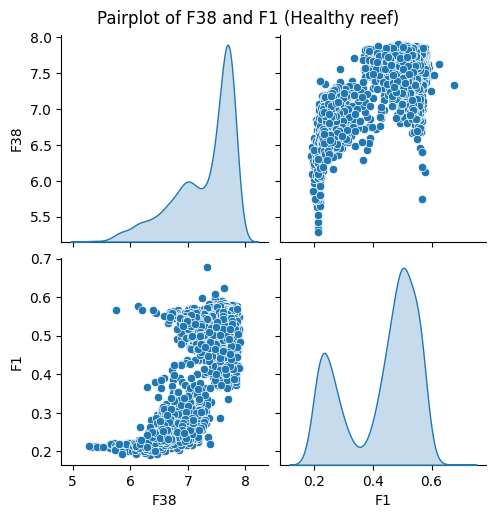

C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignor

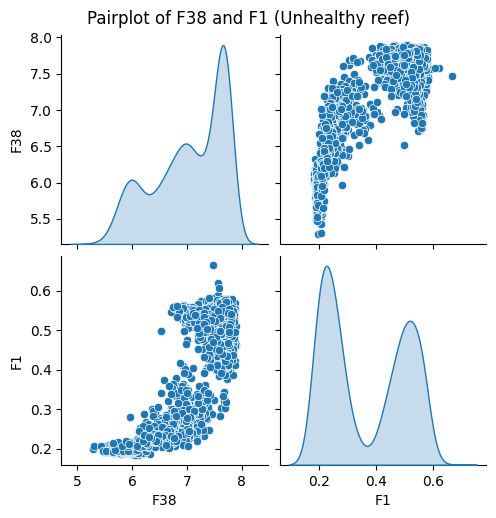

In [34]:
# Filter for only numeric data and drop missing values
pairplot_df = df[["F38", "F1", "Health"]].select_dtypes(include=[np.number]).dropna()

# Separate healthy and unhealthy data
healthy_df = pairplot_df[pairplot_df["Health"] == 1]
unhealthy_df = pairplot_df[pairplot_df["Health"] == 0]

# Plot for healthy reef
sns.pairplot(healthy_df.drop(columns=["Health"]), palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of F38 and F1 (Healthy reef)", y=1.02)
plt.show()

# Plot for unhealthy reef
sns.pairplot(unhealthy_df.drop(columns=["Health"]), palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of F38 and F1 (Unhealthy reef)", y=1.02)
plt.show()

C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignor

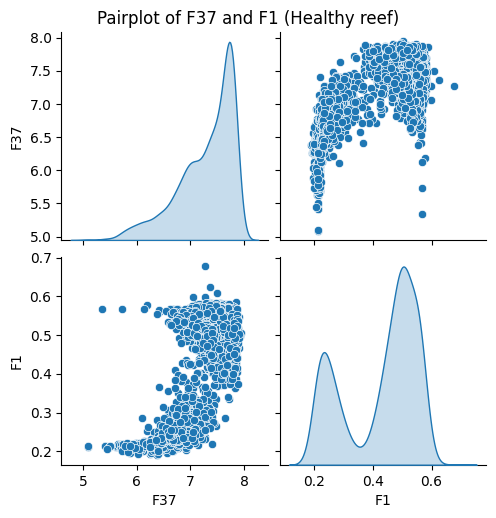

C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\boonk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignor

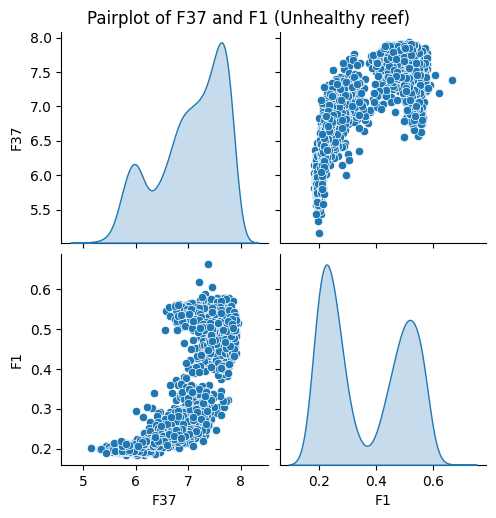

In [35]:
# Filter for only numeric data and drop missing values
pairplot_df = df[["F37", "F1", "Health"]].select_dtypes(include=[np.number]).dropna()

# Separate healthy and unhealthy data
healthy_df = pairplot_df[pairplot_df["Health"] == 1]
unhealthy_df = pairplot_df[pairplot_df["Health"] == 0]

# Plot for healthy reef
sns.pairplot(healthy_df.drop(columns=["Health"]), palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of F37 and F1 (Healthy reef)", y=1.02)
plt.show()

# Plot for unhealthy reef
sns.pairplot(unhealthy_df.drop(columns=["Health"]), palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of F37 and F1 (Unhealthy reef)", y=1.02)
plt.show()

### Next Steps

Possible conclusions:

Blue/green vs health

higher green/blue determines health while the other colour doesnt matter

or blue/green does not matter. Entirely different features

Combine top 50 of correlation and random forest

Venn diagram of both and take intersection/union of top 25 ish

Find way to plot features score and reef health

Can look at entropy? Green like f37 against health

Narrowed down to top 10 images
sus - increasing reef health and increasing entropy


F37 and F38 against the rugosity scores of the sites

In [70]:
top_20_features_corr = correlation_matrix["Health"].abs().sort_values(ascending=False).index[1:21]  # Exclude "Health" itself
print("Top 20 Most Correlated Features with Health:")
print(top_20_features_corr)

Top 20 Most Correlated Features with Health:
Index(['F1', 'F39', 'F29', 'F38', 'F37', 'F70', 'F55', 'F52', 'F71', 'F28',
       'F33', 'F72', 'F73', 'F74', 'F102', 'F27', 'F41', 'F9', 'F105', 'F40'],
      dtype='object')


In [72]:
# Print top 20 important features
print("\nTop 20 Most Important Features:")
print(feature_importances[:20])


Top 20 Most Important Features:
   Feature  Importance
54     F55    0.021353
38     F39    0.018598
0       F1    0.018506
51     F52    0.017336
33     F34    0.016718
8       F9    0.016416
70     F71    0.015871
13     F14    0.015643
34     F35    0.015562
69     F70    0.015504
15     F16    0.013720
32     F33    0.013317
1       F2    0.012868
35     F36    0.012801
3       F4    0.012692
36     F37    0.012458
37     F38    0.012384
16     F17    0.011949
41     F42    0.011865
45     F46    0.011738


In [69]:
# Convert lists to sets for easy set operations
top_50_corr_set = set(top_50_features_corr)
top_50_importance_set = set(feature_importances[:50])

# Compute intersection (common elements in both lists)
intersection_features = top_50_corr_set.intersection(top_50_importance_set)

# Compute union (all unique elements from both lists)
union_features = top_50_corr_set.union(top_50_importance_set)

# Print results
print(f"Intersection (Features in both lists): {sorted(intersection_features)}")
print(f"Union (All unique features across both lists): {sorted(union_features)}")


Intersection (Features in both lists): []
Union (All unique features across both lists): ['F1', 'F102', 'F104', 'F105', 'F14', 'F16', 'F18', 'F2', 'F21', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F33', 'F34', 'F35', 'F37', 'F38', 'F39', 'F4', 'F40', 'F41', 'F43', 'F44', 'F45', 'F49', 'F5', 'F52', 'F55', 'F56', 'F60', 'F61', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F8', 'F80', 'F81', 'F86', 'F9', 'Feature', 'Importance']


## Plotting F37 and F38 against Rugosity

In [ ]:
import pandas as pd
import os

# Define file paths
input_file_path = r"Reef_Health_Data_Merged_UNEDITED.xlsx"
output_folder = r"Excel_Rugosity"
output_file_path = os.path.join(output_folder, "Reef_Health_Data_Filtered.xlsx")

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load the Excel file
xls = pd.ExcelFile(input_file_path)

# Dictionary to store modified sheets
sheets_dict = {}

# Columns to keep
columns_to_keep = ["F37", "F38", "Health", "Country", "Site", "Rugosity"]

# Loop through each sheet in the Excel file
for sheet_name in xls.sheet_names:
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Keep only the specified columns (ignore missing ones)
    df_filtered = df[[col for col in columns_to_keep if col in df.columns]]

    # Store the updated sheet
    sheets_dict[sheet_name] = df_filtered

# Save the filtered data to a new Excel file
with pd.ExcelWriter(output_file_path, engine="openpyxl") as writer:
    for sheet, df in sheets_dict.items():
        df.to_excel(writer, sheet_name=sheet, index=False)

print(f"Filtered file saved successfully at: {output_file_path}")


In [37]:
file_path = r"Reef_Health_Data_Filtered.xlsx"
df = pd.read_excel(file_path)

In [38]:
df.head()

F37       F38  Health Country Site  Rugosity
0  7.359888  7.630275       1      MA  KAD      2.33
1  7.517678  7.741232       1      MA  KAD      2.33
2  7.443592  7.623222       1      MA  KAD      2.33
3  7.464350  7.687346       1      MA  KAD      2.33
4  7.389774  7.544752       1      MA  KAD      2.33

In [39]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (5181, 6)


In [40]:
df.dtypes

F37         float64
F38         float64
Health        int64
Country      object
Site         object
Rugosity    float64
dtype: object

In [41]:
missingValue = df.isnull().sum()
print("Missing Values in Each Column:")
print(missingValue[missingValue > 0])

Missing Values in Each Column:
Series([], dtype: int64)


In [42]:
print("Summary Stats")
print(df.describe())

Summary Stats
               F37          F38       Health     Rugosity
count  5181.000000  5181.000000  5181.000000  5181.000000
mean      7.168366     7.174671     0.529048     1.927657
std       0.586940     0.596613     0.499204     0.354789
min       5.090211     5.283800     0.000000     1.340000
25%       6.827590     6.804515     0.000000     1.680000
50%       7.325507     7.388937     1.000000     1.870000
75%       7.663312     7.677005     1.000000     2.100000
max       7.945072     7.905472     1.000000     3.330000


#### All, colour coded by country

Spearmars corr

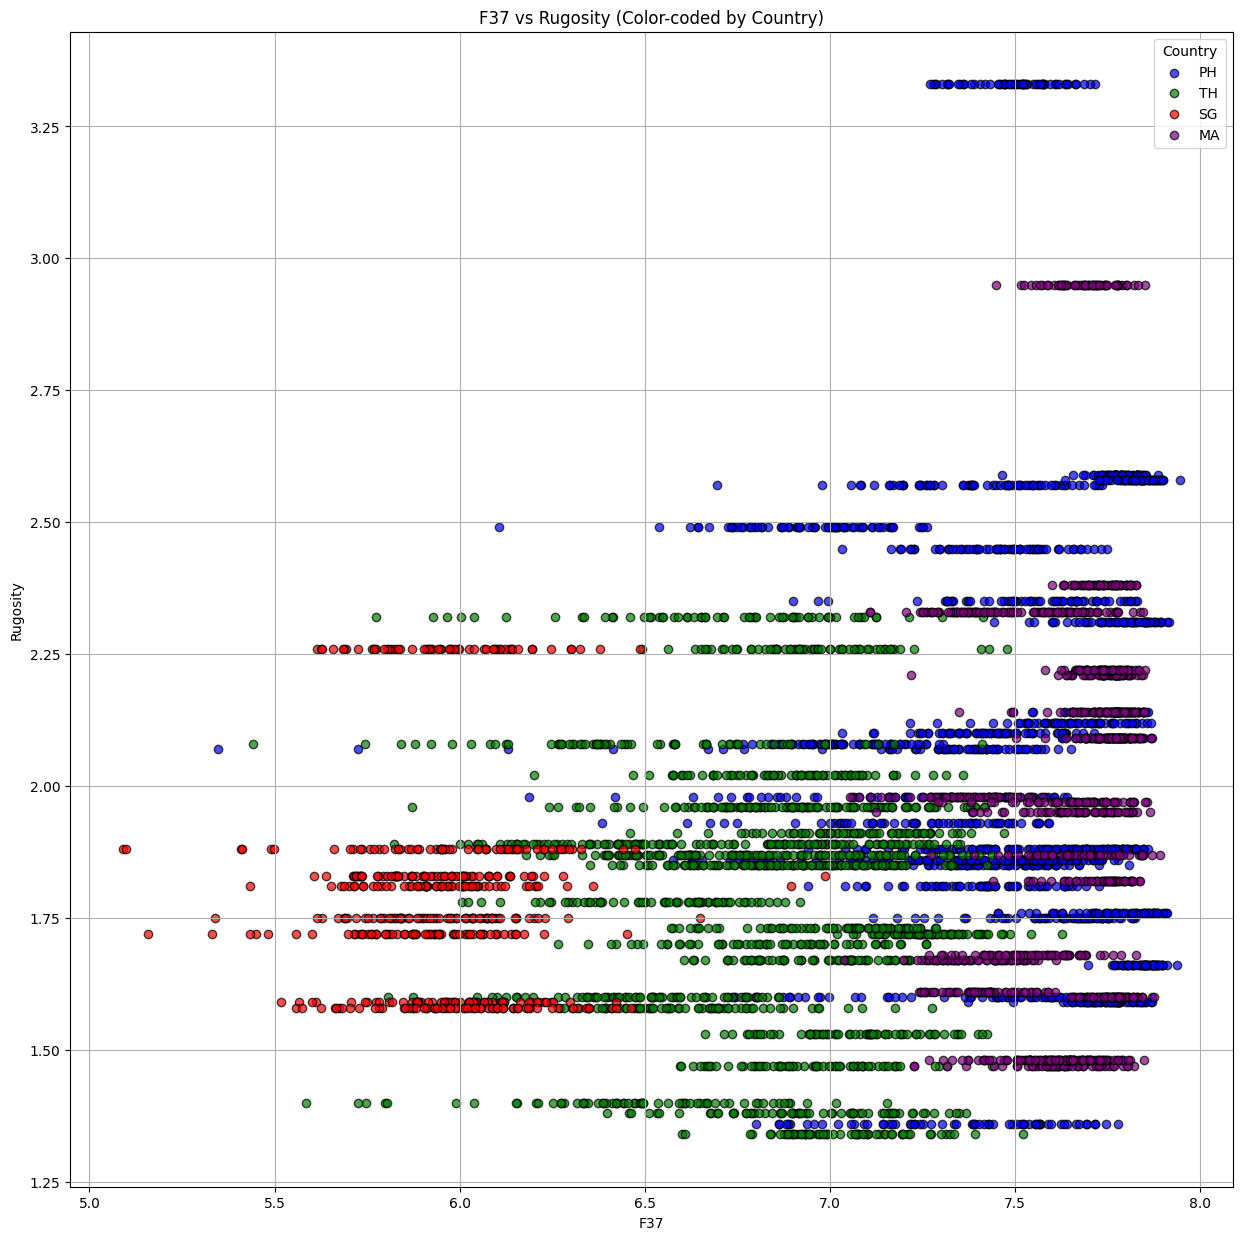

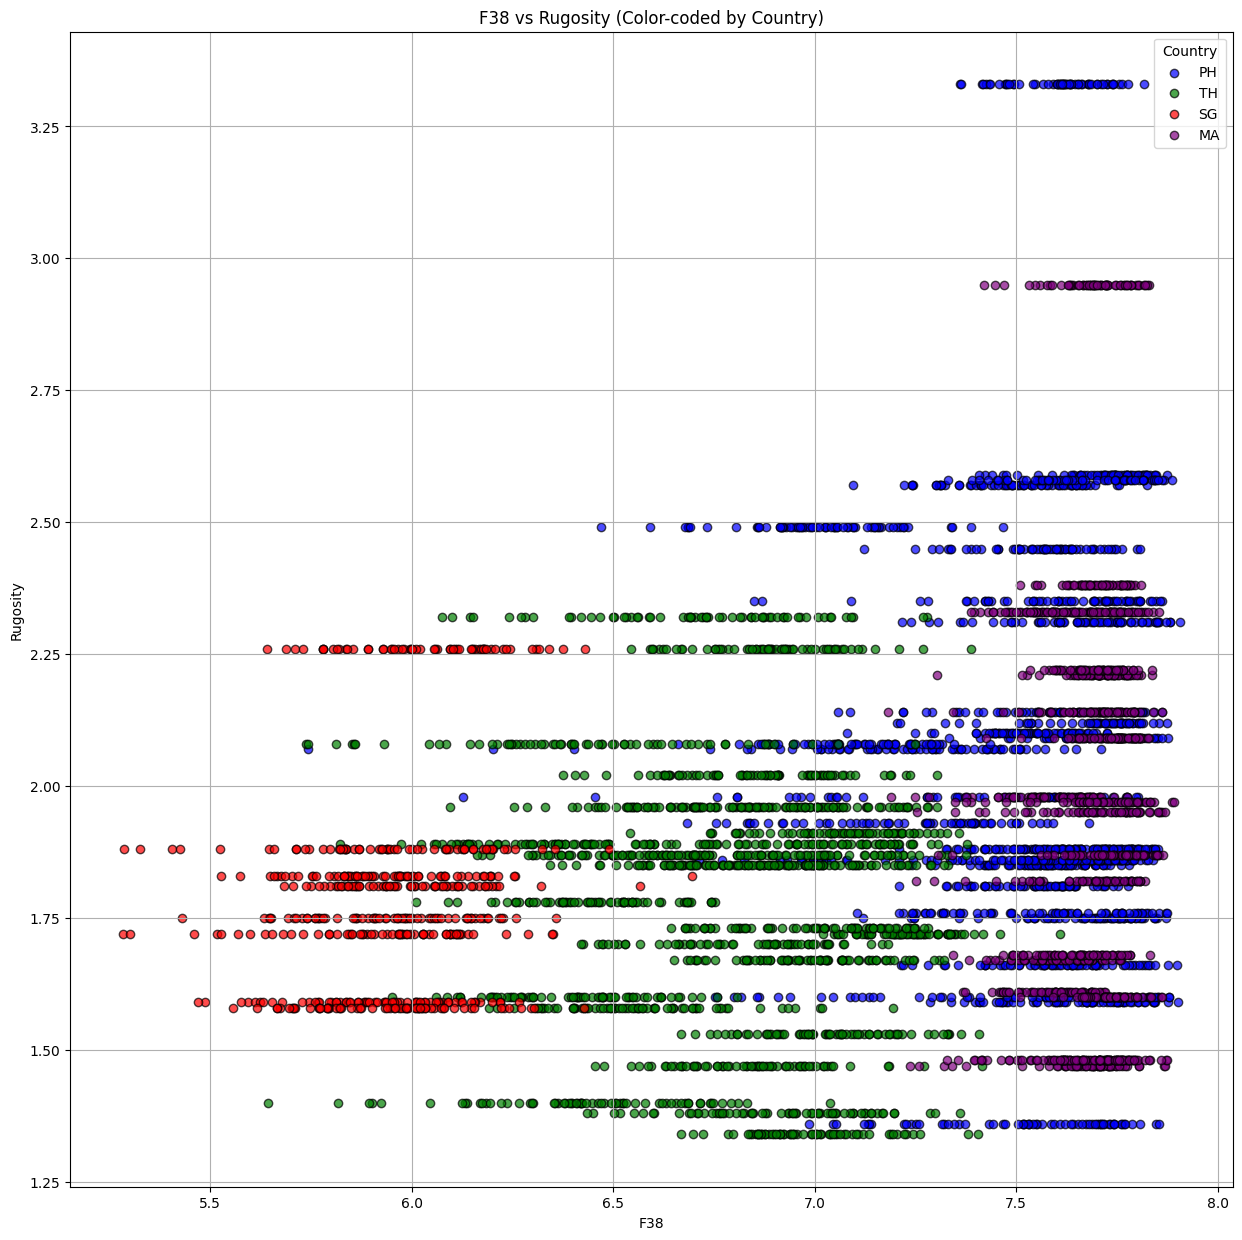

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated Excel file
file_path = r"Reef_Health_Data_Filtered.xlsx"
df = pd.read_excel(file_path)

# Define colors for each country
country_colors = {"PH": "blue", "TH": "green", "SG": "red", "MA": "purple"}

# Function to plot scatter plots
def plot_scatter(x_col, y_col, title):
    plt.figure(figsize=(15, 15))
    for country, color in country_colors.items():
        subset = df[df["Country"] == country]
        plt.scatter(subset[x_col], subset[y_col], color=color, label=country, alpha=0.7, edgecolors="black")
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.legend(title="Country")
    plt.grid(True)
    plt.show()

# Plot F37 vs Rugosity
plot_scatter("F37", "Rugosity", "F37 vs Rugosity (Color-coded by Country)")

# Plot F38 vs Rugosity
plot_scatter("F38", "Rugosity", "F38 vs Rugosity (Color-coded by Country)")


Spearman rank corr

In [44]:
from scipy.stats import spearmanr
import pandas as pd

# Load the updated Excel file
file_path = r"Reef_Health_Data_Filtered.xlsx"
df = pd.read_excel(file_path)

# Calculate Spearman’s Rank Correlation for F37 vs Rugosity
spearman_f37, p_value_f37 = spearmanr(df["F37"], df["Rugosity"])

# Calculate Spearman’s Rank Correlation for F38 vs Rugosity
spearman_f38, p_value_f38 = spearmanr(df["F38"], df["Rugosity"])

# Display results
spearman_results = pd.DataFrame({
    "Feature": ["F37", "F38"],
    "Spearman Correlation": [spearman_f37, spearman_f38],
    "P-Value": [p_value_f37, p_value_f38]
})

print(spearman_results)


  Feature  Spearman Correlation       P-Value
0     F37              0.268925  1.552276e-86
1     F38              0.258316  9.302822e-80


#### Countries, each colour coded by site

**F37 vs Rugosity**

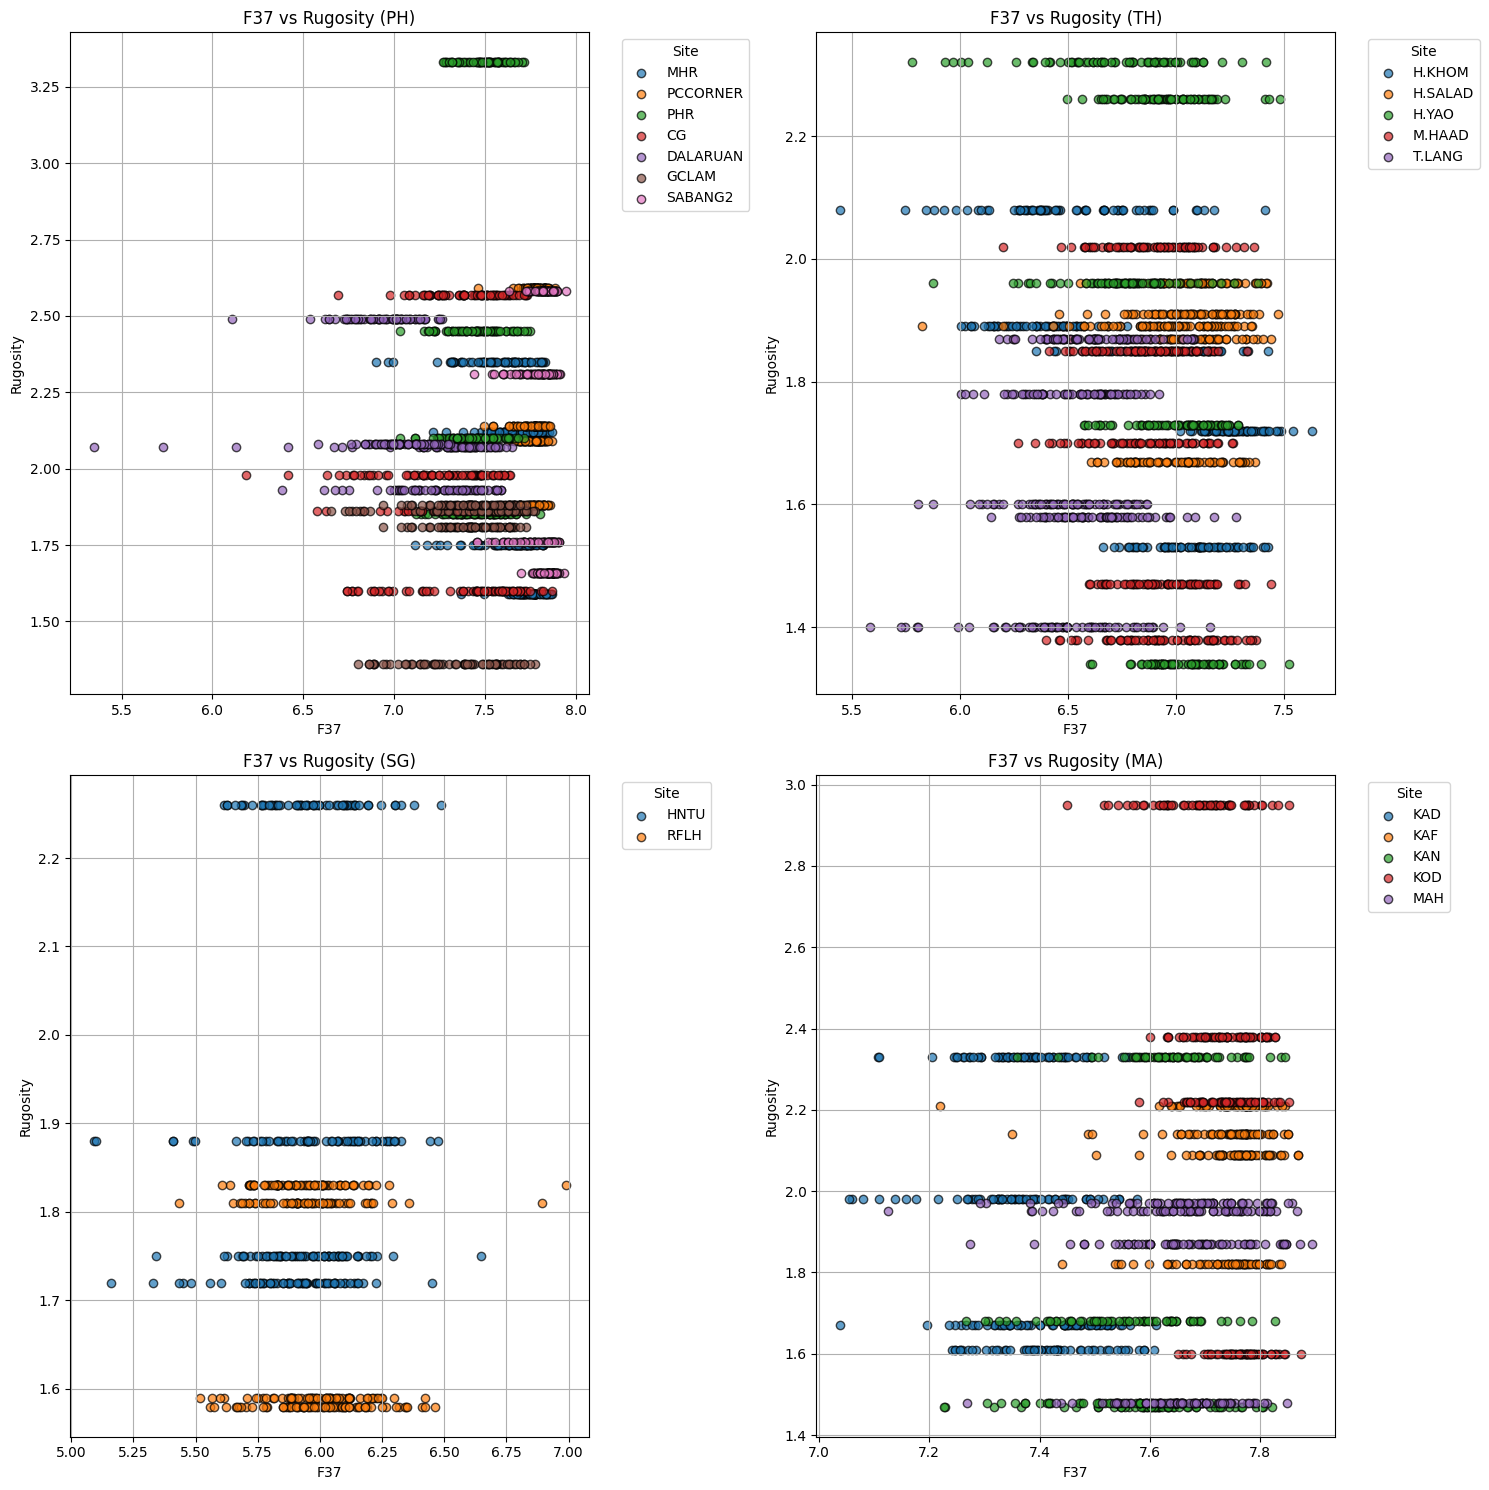

In [54]:
import matplotlib.pyplot as plt

country_sites = {country: df[df["Country"] == country]["Site"].unique() for country in df["Country"].unique()}

# Define the figure and axes for a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 2 rows, 2 columns, larger figure

# Country list for iteration
countries = ["PH", "TH", "SG", "MA"]

# Iterate through each country and assign a subplot
for ax, country in zip(axes.flatten(), countries):
    country_df = df[df["Country"] == country]
    
    # Get only the sites relevant to the country
    relevant_sites = country_sites[country]
    site_colors_filtered = {site: plt.cm.tab10(i % 10) for i, site in enumerate(relevant_sites)}

    for site, color in site_colors_filtered.items():
        subset = country_df[country_df["Site"] == site]
        ax.scatter(subset["F37"], subset["Rugosity"], color=color, label=site, alpha=0.7, edgecolors="black")

    ax.set_xlabel("F37")
    ax.set_ylabel("Rugosity")
    ax.set_title(f"F37 vs Rugosity ({country})")
    ax.legend(title="Site", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**F38 VS Rugosity**

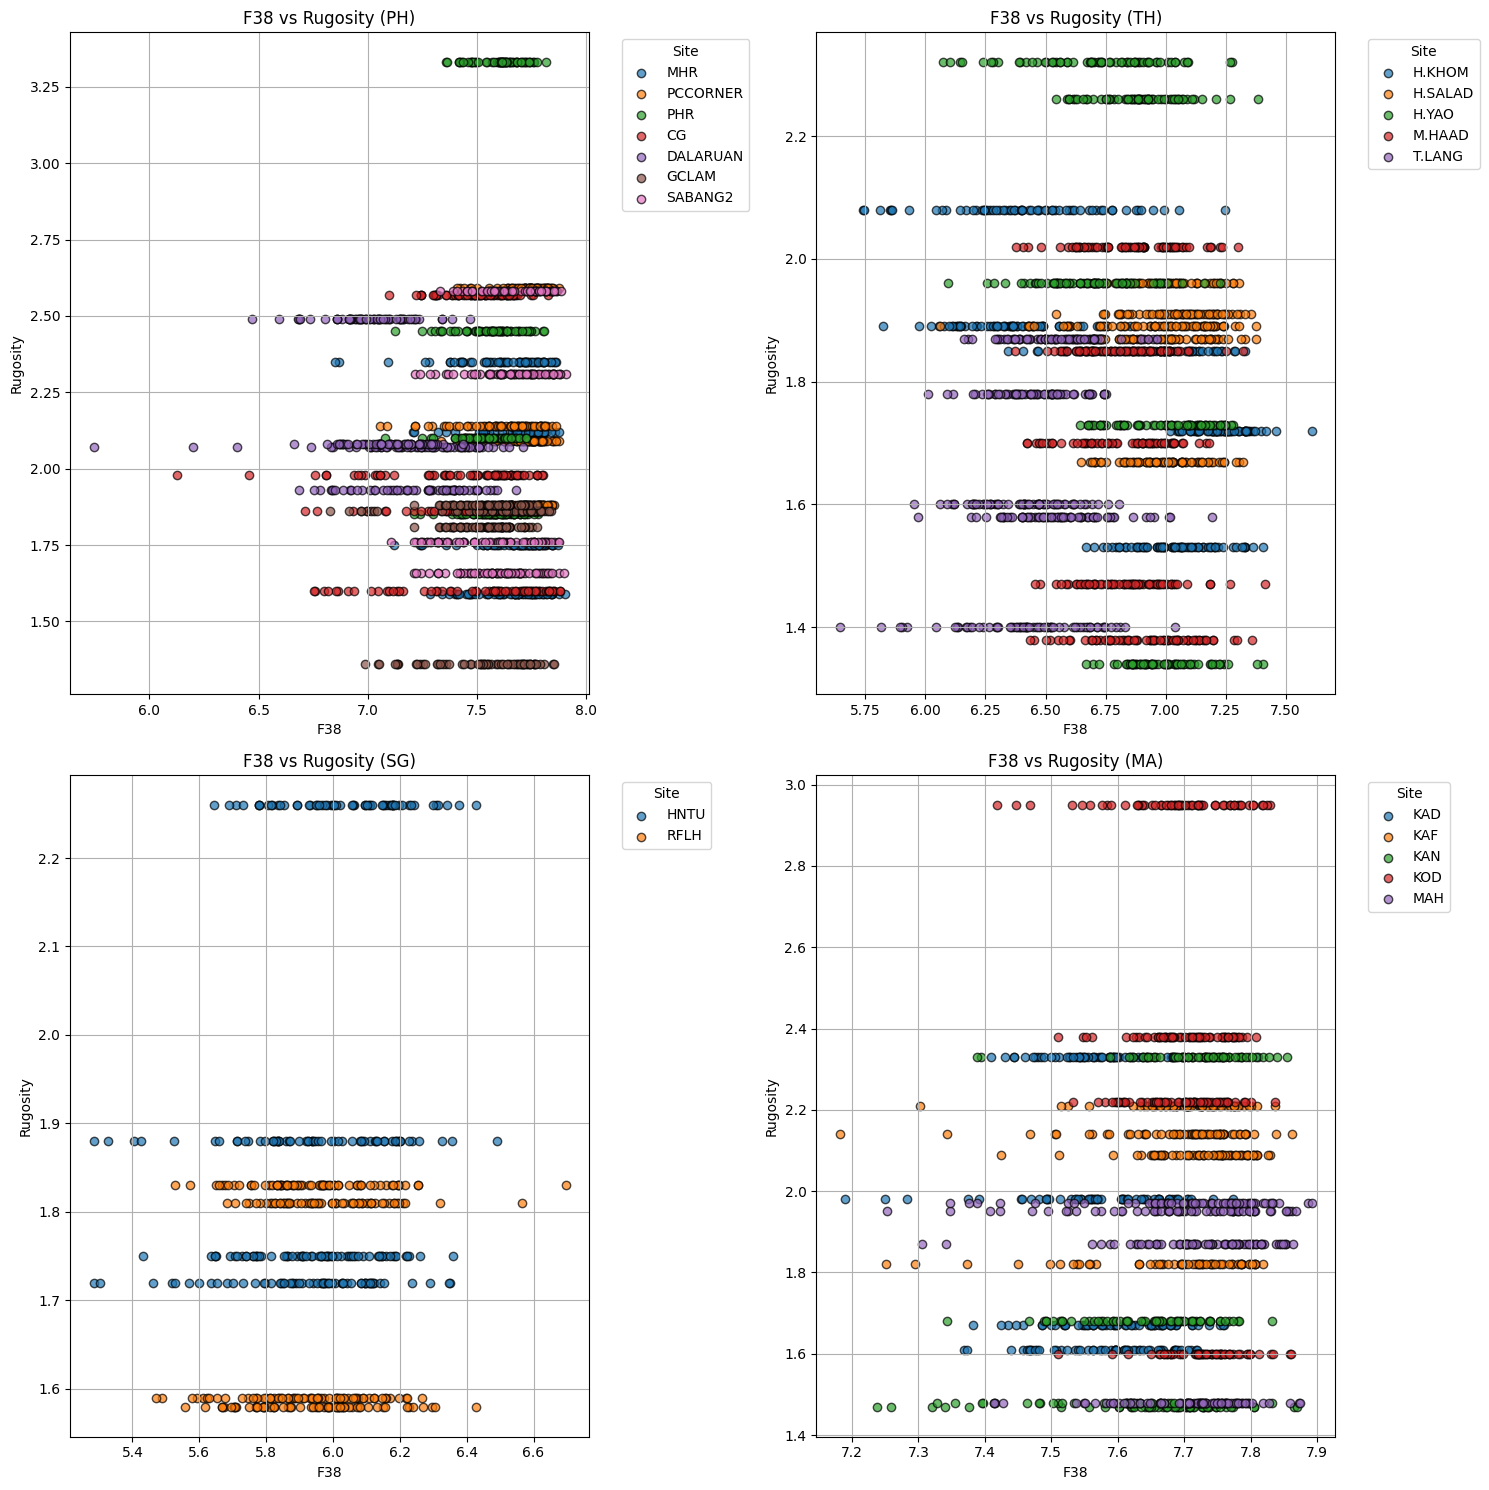

In [55]:
import matplotlib.pyplot as plt

# Define the figure and axes for a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 2 rows, 2 columns, larger figure

# Country list for iteration
countries = ["PH", "TH", "SG", "MA"]

# Iterate through each country and assign a subplot
for ax, country in zip(axes.flatten(), countries):
    country_df = df[df["Country"] == country]
    
    # Get only the sites relevant to the country
    relevant_sites = country_sites[country]
    site_colors_filtered = {site: plt.cm.tab10(i % 10) for i, site in enumerate(relevant_sites)}

    for site, color in site_colors_filtered.items():
        subset = country_df[country_df["Site"] == site]
        ax.scatter(subset["F38"], subset["Rugosity"], color=color, label=site, alpha=0.7, edgecolors="black")

    ax.set_xlabel("F38")
    ax.set_ylabel("Rugosity")
    ax.set_title(f"F38 vs Rugosity ({country})")
    ax.legend(title="Site", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


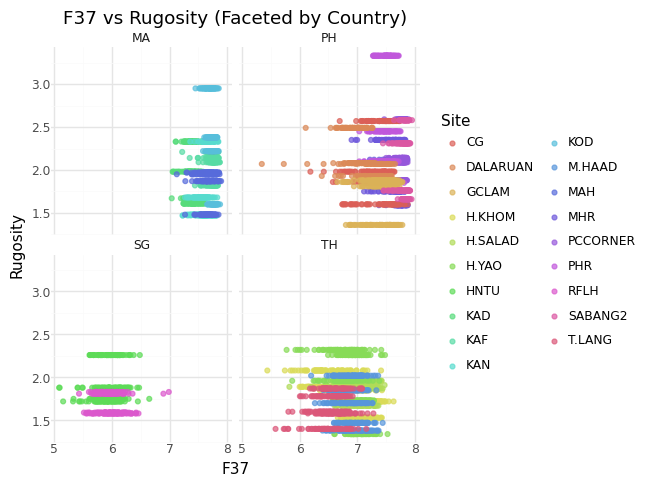

In [47]:
from plotnine import ggplot, aes, geom_point, facet_wrap, labs, theme, theme_minimal

# Load the data
file_path = r"Reef_Health_Data_Filtered.xlsx"
df = pd.read_excel(file_path)

# Scatter plot using ggplot (F37 vs Rugosity, color-coded by Site)
plot = (
    ggplot(df, aes(x="F37", y="Rugosity", color="Site"))  # Set aesthetics
    + geom_point(alpha=0.7)  # Add scatter points with transparency
    + facet_wrap("~Country")  # Create separate graphs for each country
    + labs(title="F37 vs Rugosity (Faceted by Country)", x="F37", y="Rugosity")
    + theme_minimal()  # Use a clean theme
)

plot.draw()


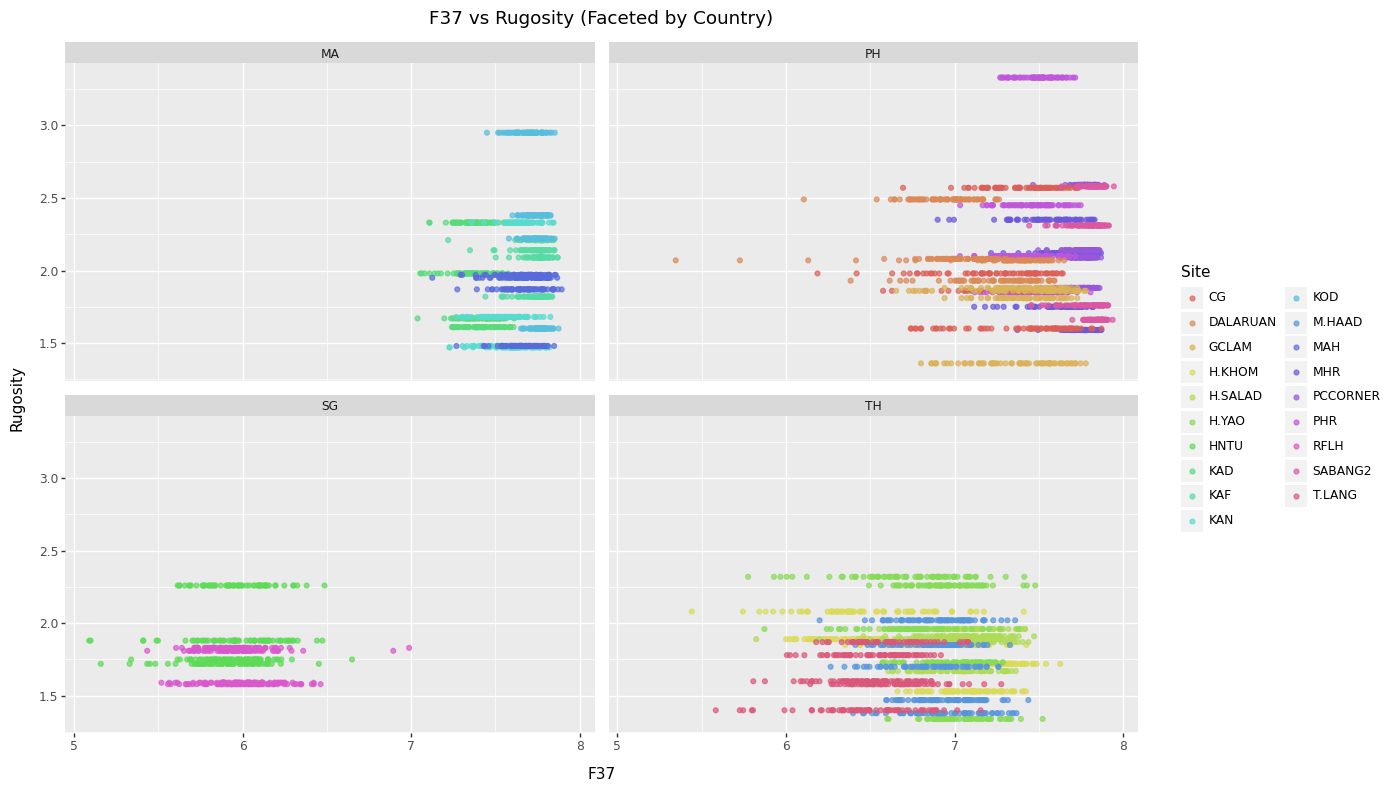

In [48]:
plot = (
    ggplot(df, aes(x="F37", y="Rugosity", color="Site"))
    + geom_point(alpha=0.7)
    + facet_wrap("~Country")
    + labs(title="F37 vs Rugosity (Faceted by Country)", x="F37", y="Rugosity")
    + theme(figure_size=(14, 8))  # Increased width and height
)

plot.draw()


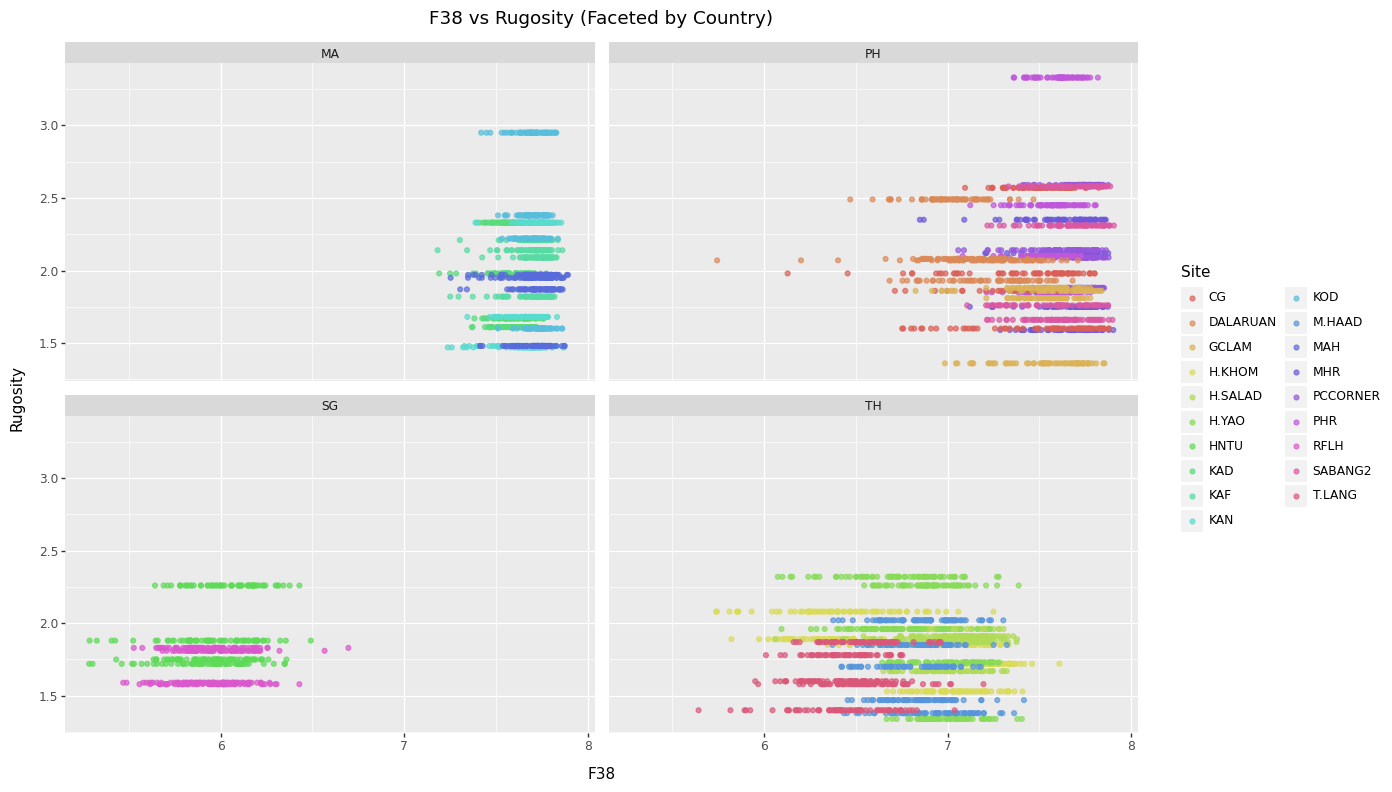

In [49]:
plot = (
    ggplot(df, aes(x="F38", y="Rugosity", color="Site"))
    + geom_point(alpha=0.7)
    + facet_wrap("~Country")
    + labs(title="F38 vs Rugosity (Faceted by Country)", x="F38", y="Rugosity")
    + theme(figure_size=(14, 8))  # Increased width and height
)

plot.draw()


#### F37


In [50]:
import seaborn as sns

# Inside your for-loop (after ax.scatter...), add:
sns.regplot(
    data=country_df,
    x="F37", y="Rugosity",
    scatter=False,
    ax=ax,
    line_kws={"color": "red", "label": "Trend"},
    lowess=True  # Use locally weighted smoothing for non-linearity
)


<Axes: xlabel='F37', ylabel='Rugosity'>

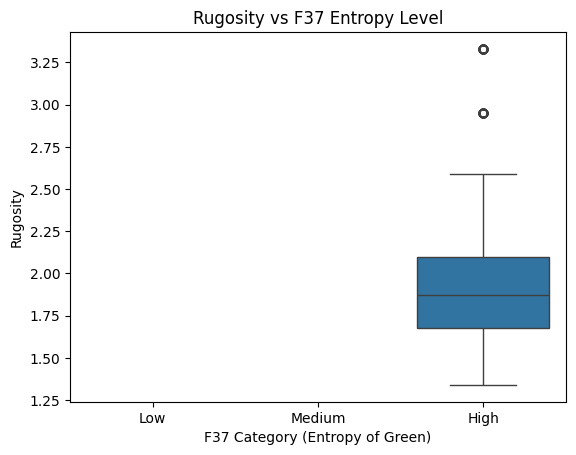

In [51]:
df["F37_category"] = pd.cut(df["F37"], bins=[0, 1.5, 3.0, df["F37"].max()], labels=["Low", "Medium", "High"])

sns.boxplot(x="F37_category", y="Rugosity", data=df)
plt.title("Rugosity vs F37 Entropy Level")
plt.xlabel("F37 Category (Entropy of Green)")
plt.ylabel("Rugosity")
plt.show()


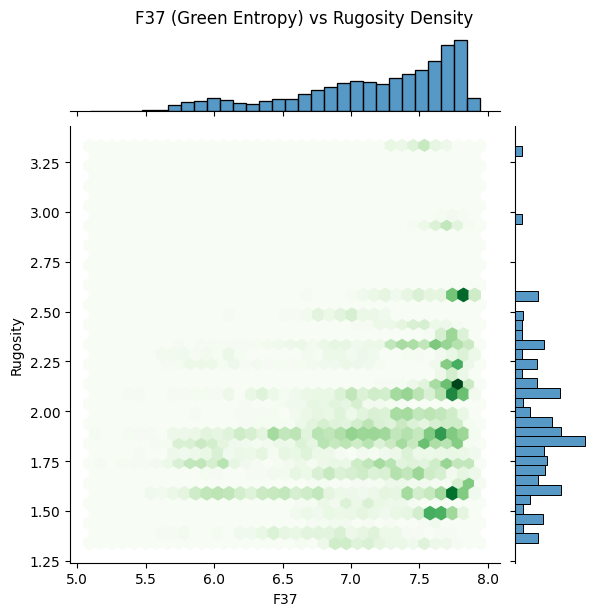

In [52]:
sns.jointplot(data=df, x="F37", y="Rugosity", kind="hex", cmap="Greens")
plt.suptitle("F37 (Green Entropy) vs Rugosity Density", y=1.02)
plt.show()


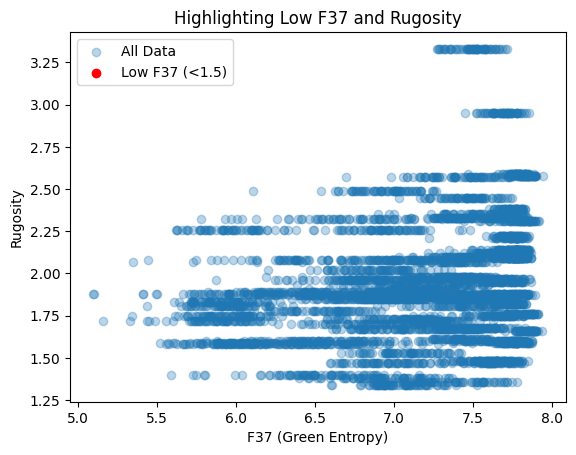

In [53]:
low_entropy_df = df[df["F37"] < 1.5]  # example threshold
plt.scatter(df["F37"], df["Rugosity"], alpha=0.3, label="All Data")
plt.scatter(low_entropy_df["F37"], low_entropy_df["Rugosity"], color="red", label="Low F37 (<1.5)")
plt.xlabel("F37 (Green Entropy)")
plt.ylabel("Rugosity")
plt.legend()
plt.title("Highlighting Low F37 and Rugosity")
plt.show()


In [61]:
pip install scikit-misc


Note: you may need to restart the kernel to use updated packages.


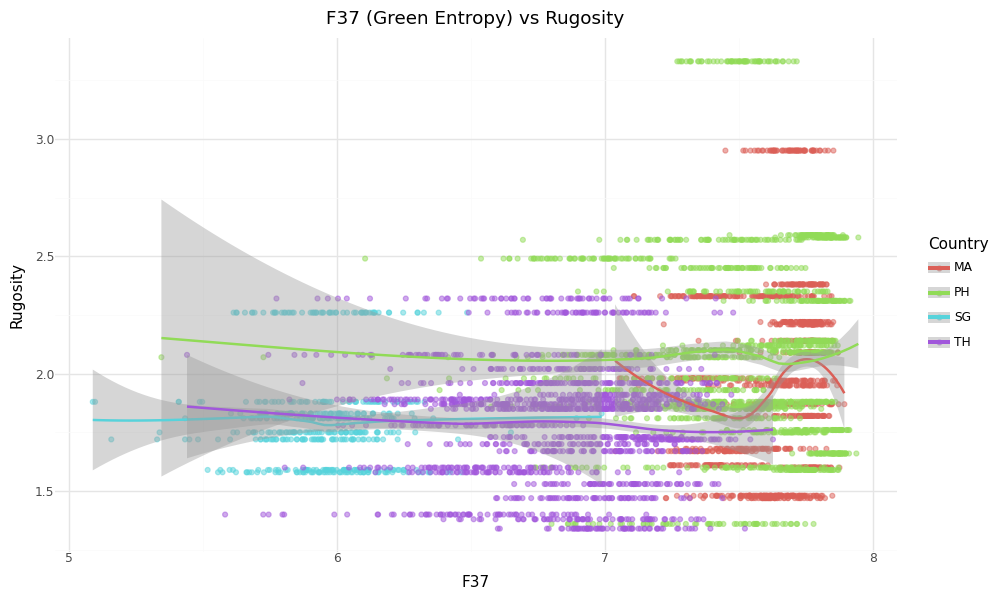

In [62]:
from plotnine import ggplot, aes, geom_point, geom_smooth, facet_wrap, labs, theme_minimal, theme

plot = (
    ggplot(df, aes(x="F37", y="Rugosity", color="Country"))
    + geom_point(alpha=0.5)
    + geom_smooth(method="loess", se=True)  # Adds a smooth line with confidence interval
    + labs(title="F37 (Green Entropy) vs Rugosity", x="F37", y="Rugosity")
    + theme_minimal()
    + theme(figure_size=(10, 6))
)
plot.draw()

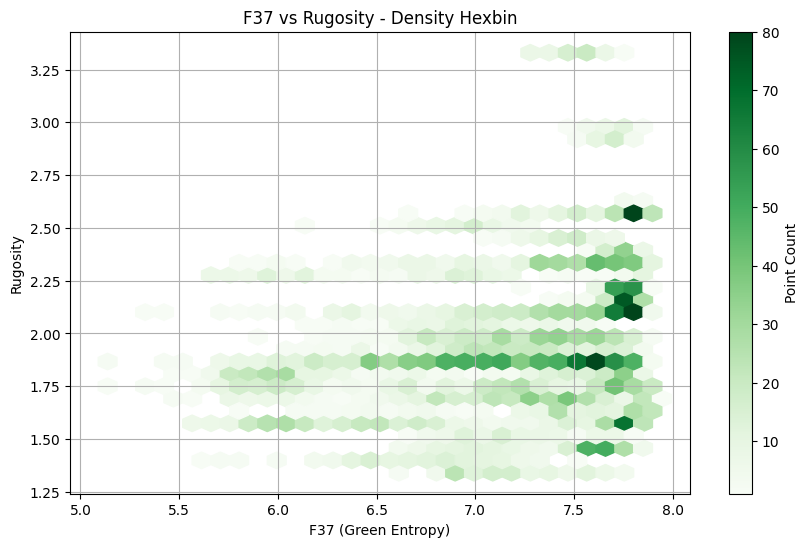

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(df["F37"], df["Rugosity"], gridsize=30, cmap='Greens', mincnt=1)
plt.colorbar(label='Point Count')
plt.xlabel("F37 (Green Entropy)")
plt.ylabel("Rugosity")
plt.title("F37 vs Rugosity - Density Hexbin")
plt.grid(True)
plt.show()


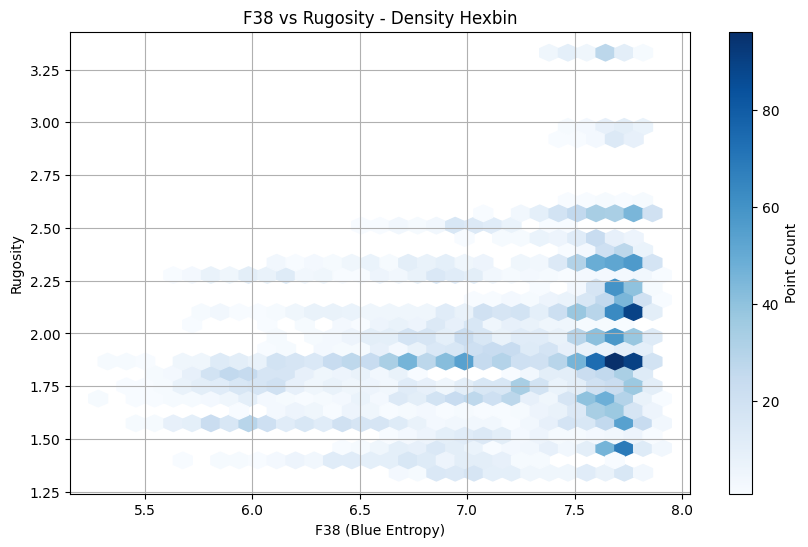

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(df["F38"], df["Rugosity"], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Point Count')
plt.xlabel("F38 (Blue Entropy)")
plt.ylabel("Rugosity")
plt.title("F38 vs Rugosity - Density Hexbin")
plt.grid(True)
plt.show()
